# 앙상블 학습 (Ensemble Learning)

## 학습 목표
1. **앙상블 학습**의 개념과 장점을 이해할 수 있다
2. **배깅(Bagging)** 과 **부스팅(Boosting)** 의 차이점을 설명할 수 있다
3. **랜덤 포레스트(Random Forest)** 를 구현하고 적용할 수 있다
4. **그래디언트 부스팅(Gradient Boosting)** 알고리즘을 이해할 수 있다
5. **XGBoost, LightGBM** 등 최신 부스팅 알고리즘을 활용할 수 있다
6. **특성 중요도(Feature Importance)** 를 분석할 수 있다

## 주요 내용
### 배깅 (Bagging)
- Random Forest (랜덤 포레스트)
- BaggingClassifier / BaggingRegressor

### 부스팅 (Boosting)
- AdaBoost
- Gradient Boosting
- XGBoost
- LightGBM

### 기타 앙상블
- Voting Classifier
- Stacking

## 앙상블(Ensemble)

**여러개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법**이다.

- 여러 모델을 이용하여 데이터를 학습하고, 모든 모델의 예측결과를 평균하여 예측

**앙상블 기법의 대표적인 종류**
- 보팅 (Voting): 투표를 통해 결과 도출
- 배깅 (Bagging): 샘플 중복 생성을 통해 결과 도출
- 부스팅 (Boosting): 이전 오차를 보완하면서 가중치 부여
- 스태킹 (Stacking): 여러 모델을 기반으로 예측된 결과를 통해 meta 모델이 다시 한번 예측

**참고자료 (블로그)**

* [보팅(Voting)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)
* [배깅(Bagging)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)
* [부스팅(Boosting)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3)

**Voting**

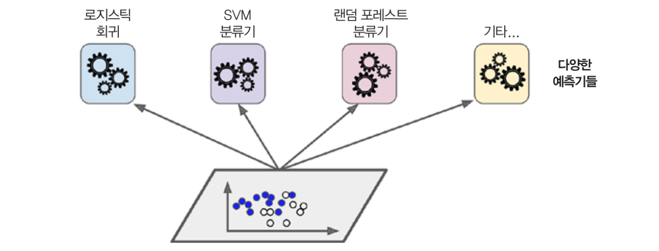

**Hard Voting(직접투표)**

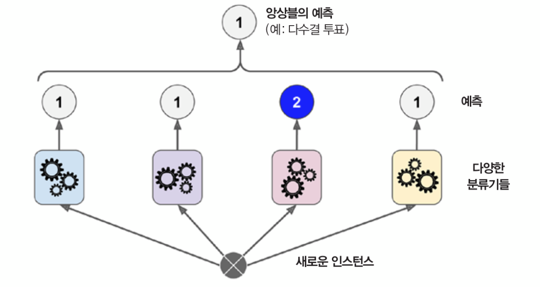

**Bagging(베깅)**

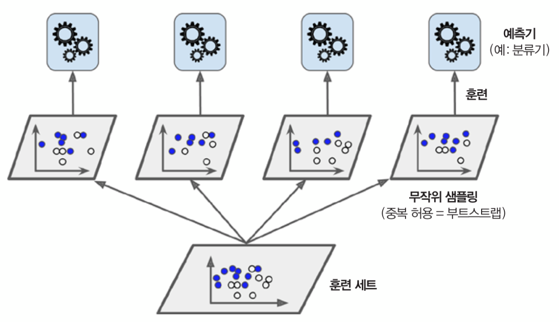

## 실습을 위한 데이터셋 로드 (California Housing)

> 참고: 기존에 사용하던 Boston Housing 데이터셋은 sklearn 1.2 버전부터 제거되었습니다.
> 대신 California Housing 데이터셋을 사용합니다.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

np.set_printoptions(suppress=True)

In [2]:
# load_boston은 sklearn 1.2+에서 제거됨 → California Housing 사용
from sklearn.datasets import fetch_california_housing

데이터 로드

In [3]:
data = fetch_california_housing()

**컬럼 소개 (California Housing Dataset)**

속성 수 : 8

* **MedInc**: 블록 그룹의 중간 소득
* **HouseAge**: 블록 그룹의 중간 주택 연령
* **AveRooms**: 가구당 평균 방 수
* **AveBedrms**: 가구당 평균 침실 수
* **Population**: 블록 그룹 인구
* **AveOccup**: 가구당 평균 거주자 수
* **Latitude**: 블록 그룹 위도
* **Longitude**: 블록 그룹 경도
* **MedHouseVal**: 중간 주택 가격 (타겟, $100,000 단위)

In [4]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [5]:
# California Housing의 타겟 컬럼명은 'MedHouseVal' (중간 주택 가격)
df['MedHouseVal'] = data['target']

In [6]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

train / test 데이터를 분할 합니다.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MedHouseVal', axis=1), df['MedHouseVal'], random_state=42)

In [9]:
x_train.shape, x_test.shape

((15480, 8), (5160, 8))

In [10]:
x_train.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
8158   4.2143      37.0  5.288235   0.973529       860.0  2.529412     33.81   
18368  5.3468      42.0  6.364322   1.087940       957.0  2.404523     37.16   
19197  3.9191      36.0  6.110063   1.059748       711.0  2.235849     38.45   
3746   6.3703      32.0  6.000000   0.990196      1159.0  2.272549     34.16   
13073  2.3684      17.0  4.795858   1.035503       706.0  2.088757     38.57   

       Longitude  
8158     -118.12  
18368    -121.98  
19197    -122.69  
3746     -118.41  
13073    -121.33

In [11]:
y_train.head()

8158     2.285
18368    2.799
19197    1.830
3746     4.658
13073    1.500
Name: MedHouseVal, dtype: float64

## 평가 지표 만들기

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값

### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값

### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값

### sklearn의 평가지표 활용하기

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 모델별 성능 확인을 위한 함수

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

## 단일 회귀예측 모델

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

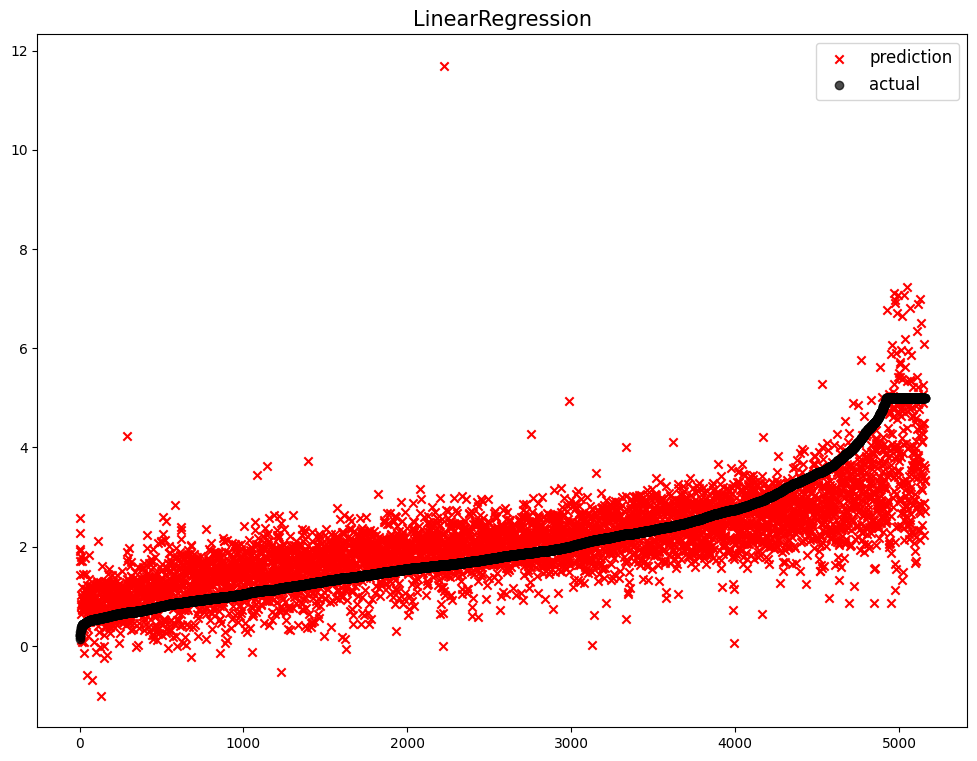

              model       mse
0  LinearRegression  0.541129


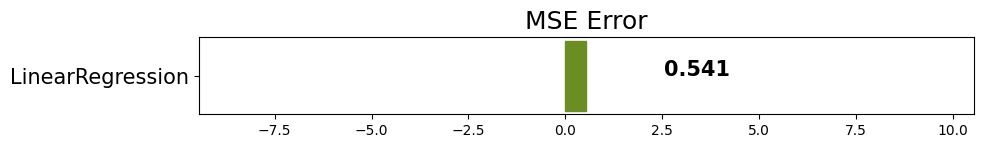

In [15]:
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(x_train, y_train)
pred = linear_reg.predict(x_test)
mse_eval('LinearRegression', pred, y_test)

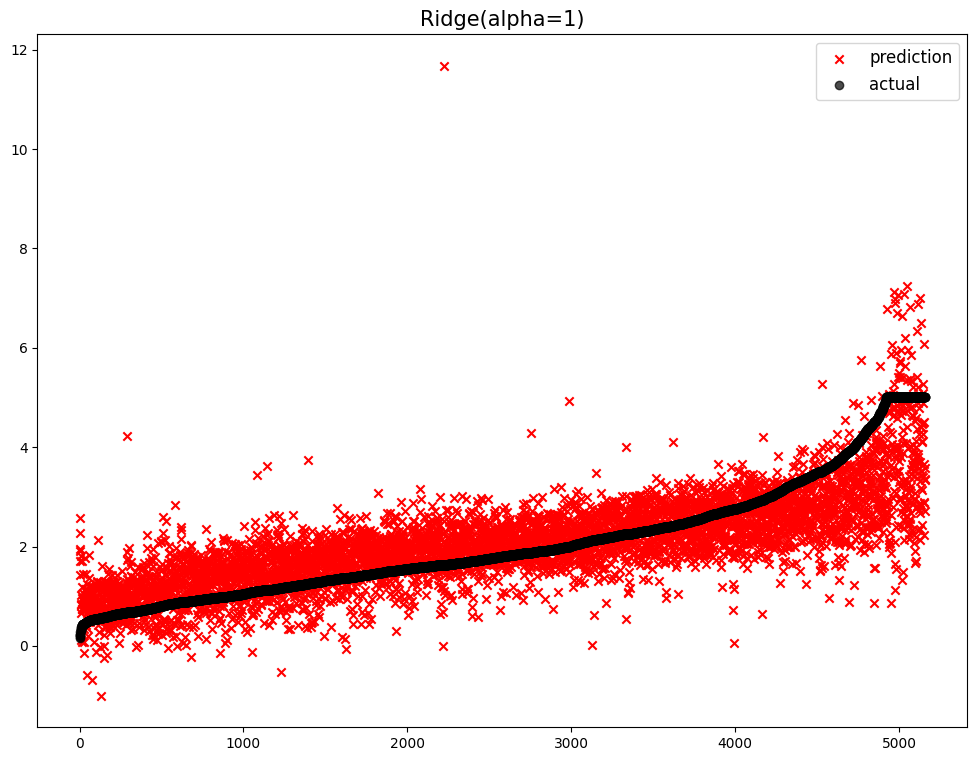

              model       mse
0  LinearRegression  0.541129
1    Ridge(alpha=1)  0.541047


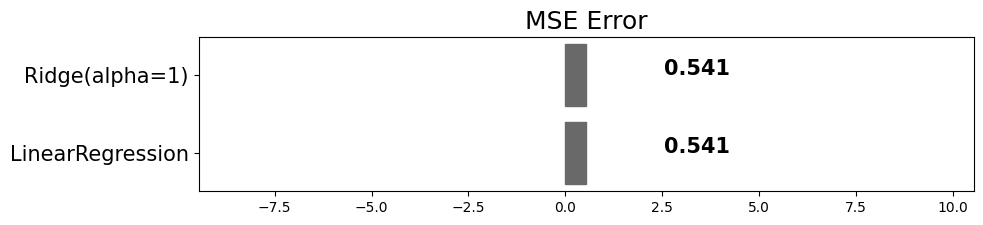

In [16]:
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
mse_eval('Ridge(alpha=1)', pred, y_test)

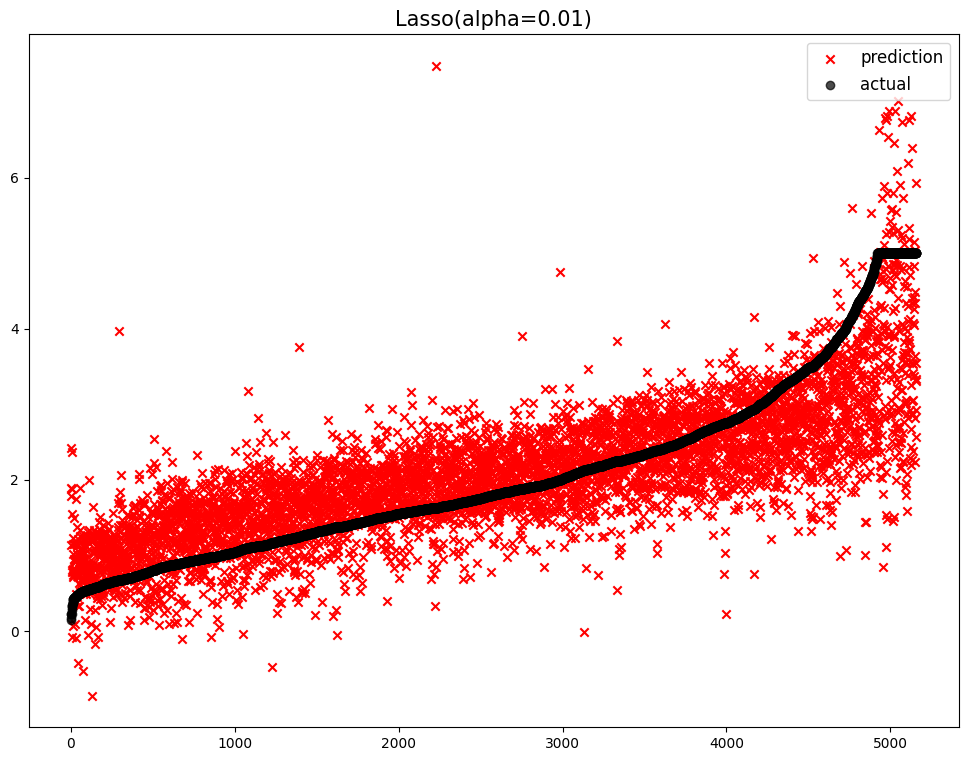

               model       mse
0   LinearRegression  0.541129
1     Ridge(alpha=1)  0.541047
2  Lasso(alpha=0.01)  0.532027


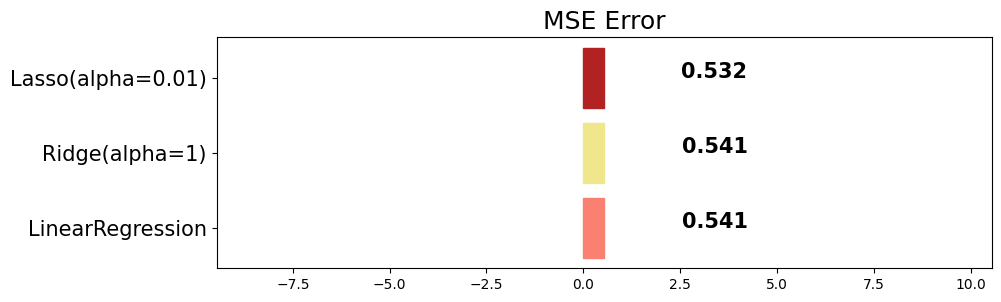

In [17]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse_eval('Lasso(alpha=0.01)', pred, y_test)

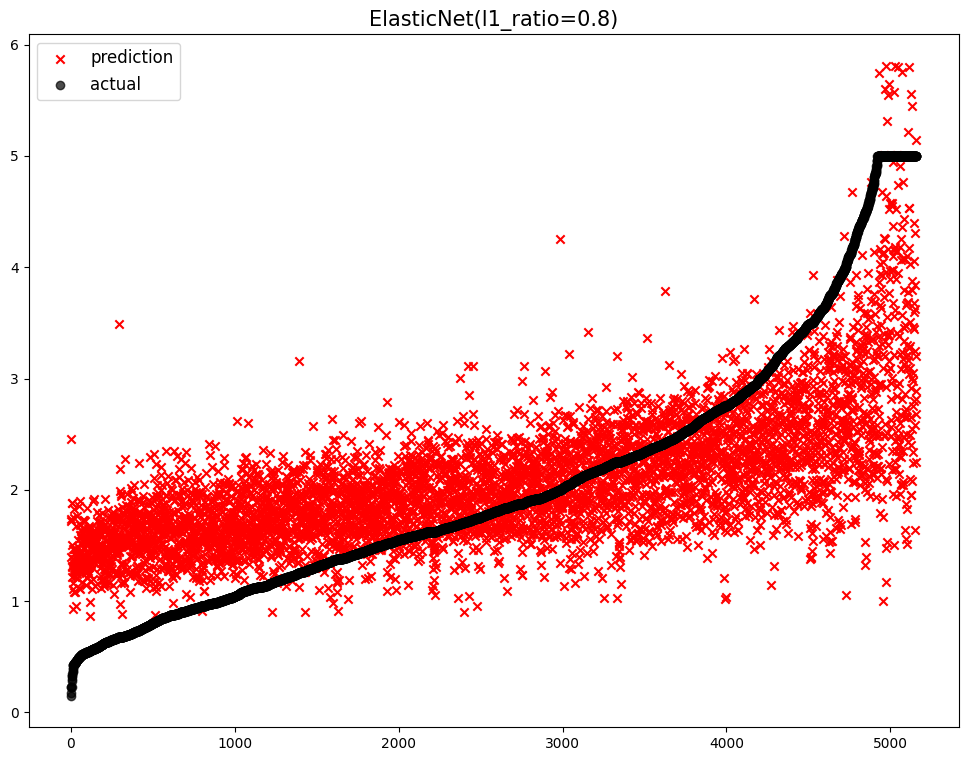

                      model       mse
0  ElasticNet(l1_ratio=0.8)  0.704071
1          LinearRegression  0.541129
2            Ridge(alpha=1)  0.541047
3         Lasso(alpha=0.01)  0.532027


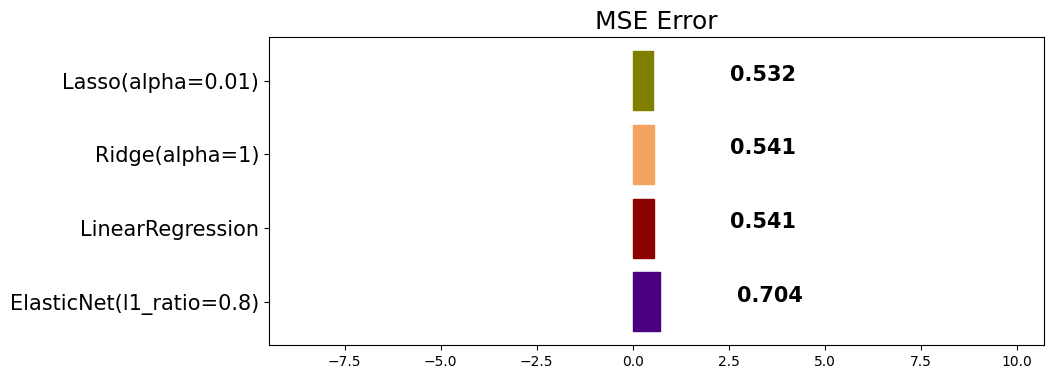

In [18]:
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.8)
elasticnet.fit(x_train, y_train)
pred = elasticnet.predict(x_test)
mse_eval('ElasticNet(l1_ratio=0.8)', pred, y_test)    

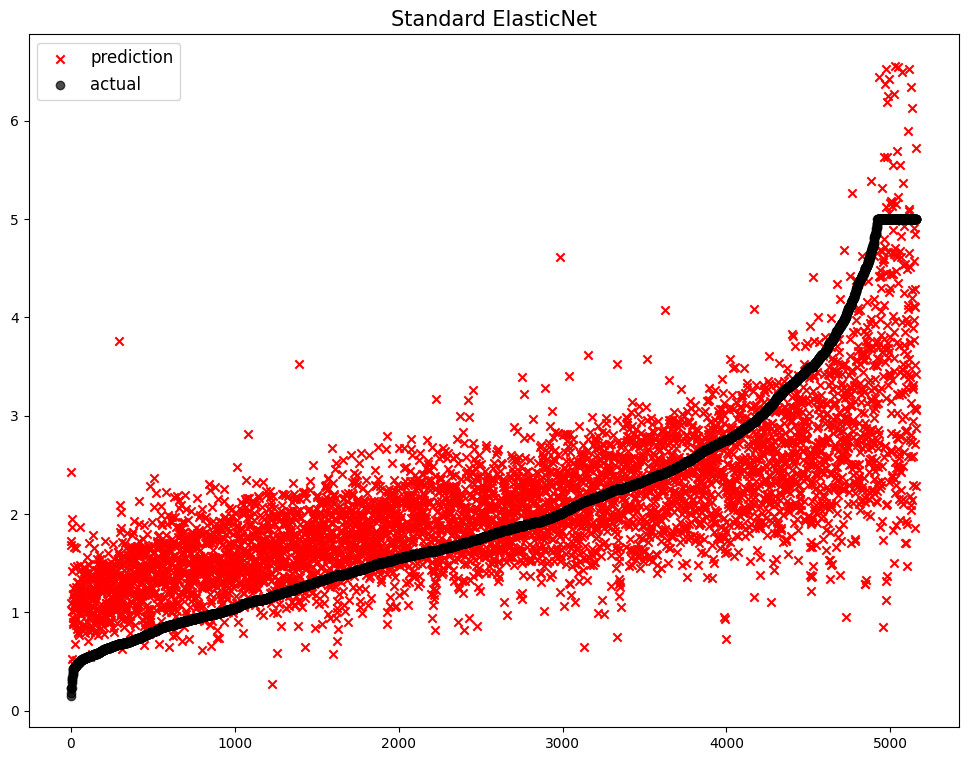

                      model       mse
0  ElasticNet(l1_ratio=0.8)  0.704071
1       Standard ElasticNet  0.592188
2          LinearRegression  0.541129
3            Ridge(alpha=1)  0.541047
4         Lasso(alpha=0.01)  0.532027


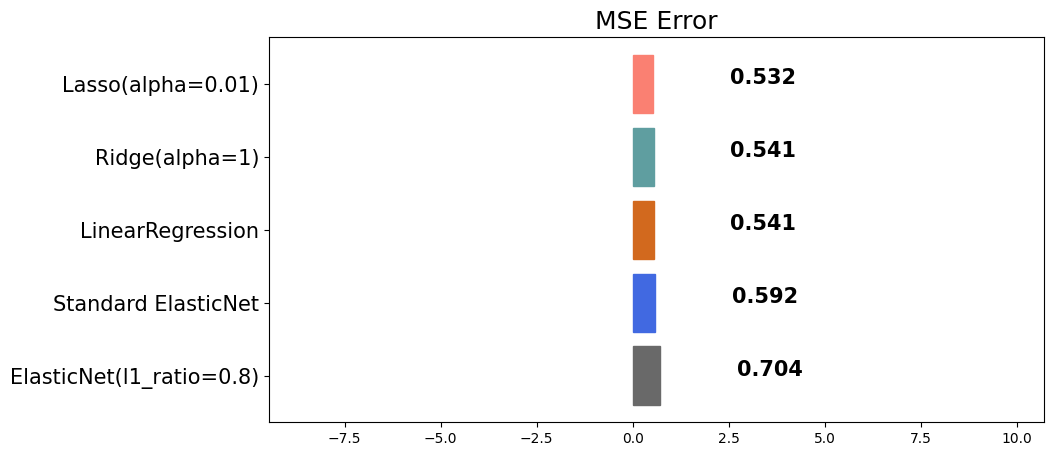

In [19]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

c:\Users\park0\miniconda3\envs\myDS\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+01, tolerance: 2.066e+00
  model = cd_fast.enet_coordinate_descent(


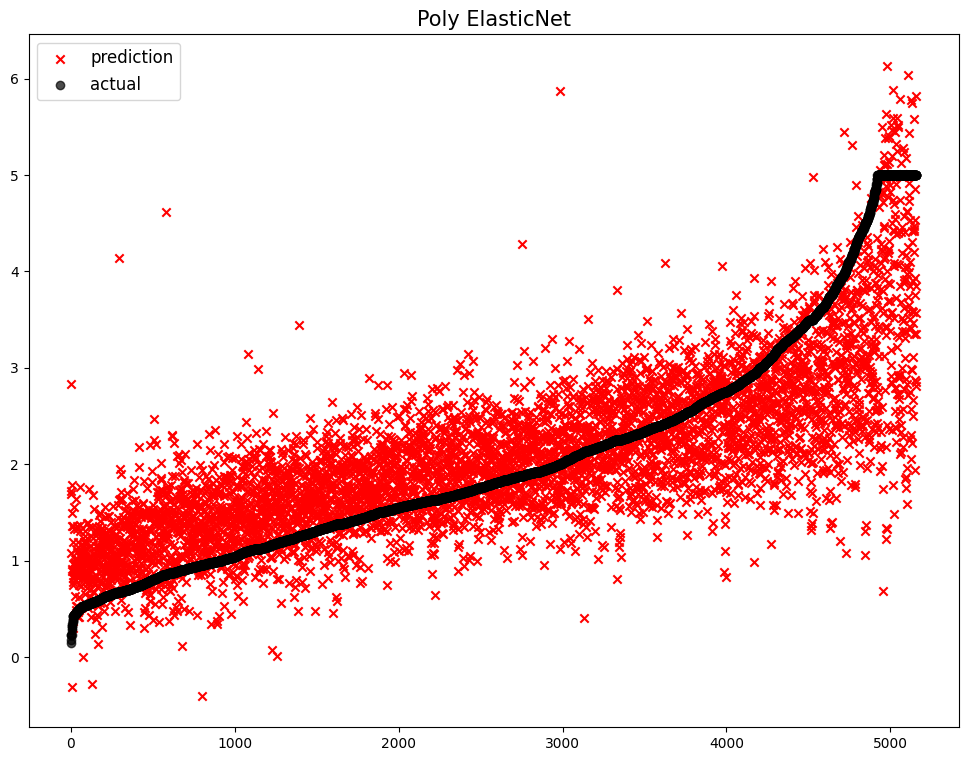

                      model       mse
0  ElasticNet(l1_ratio=0.8)  0.704071
1       Standard ElasticNet  0.592188
2          LinearRegression  0.541129
3            Ridge(alpha=1)  0.541047
4         Lasso(alpha=0.01)  0.532027
5           Poly ElasticNet  0.517807


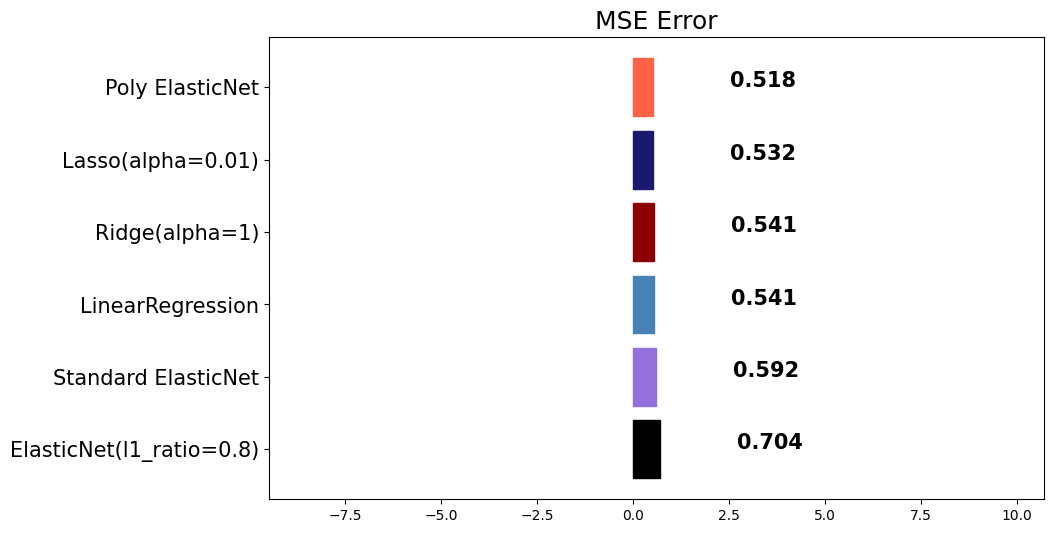

In [20]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=7, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Poly ElasticNet', poly_pred, y_test)

## 앙상블 (Ensemble)

[scikit-learn 도큐먼트](https://scikit-learn.org/stable/modules/classes.html?highlight=ensemble#module-sklearn.ensemble)

### 보팅 (Voting) - 회귀 (Regression)

Voting은 단어 뜻 그대로 **투표를 통해 결정하는 방식**입니다. Voting은 Bagging과 투표방식이라는 점에서 유사하지만, 다음과 같은 큰 차이점이 있습니다.

- Voting은 다른 알고리즘 model을 조합해서 사용합니다.
- Bagging은 같은 알고리즘 내에서 다른 sample 조합을 사용합니다.


In [21]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

반드시, **Tuple 형태로 모델**을 정의해야 합니다.

In [22]:
single_models = [
    ('linear_reg', linear_reg), 
    ('ridge', ridge), 
    ('lasso', lasso), 
    ('elasticnet_pipeline', elasticnet_pipeline), 
    ('poly_pipeline', poly_pipeline)
]

In [23]:
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

In [24]:
voting_regressor.fit(x_train, y_train)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet_pipeline',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))])),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(degree=7,
                                                                 include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))]))],
                n_jobs=-1)

In [25]:
voting_pred = voting_regressor.predict(x_test)

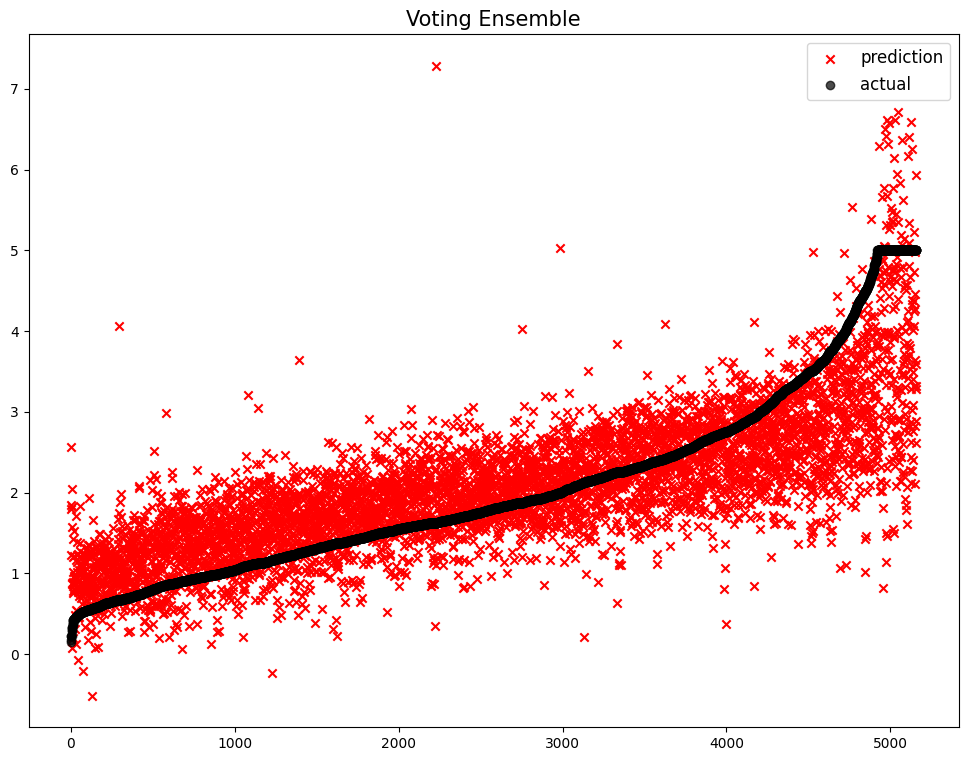

                      model       mse
0  ElasticNet(l1_ratio=0.8)  0.704071
1       Standard ElasticNet  0.592188
2          LinearRegression  0.541129
3            Ridge(alpha=1)  0.541047
4         Lasso(alpha=0.01)  0.532027
5           Voting Ensemble  0.527863
6           Poly ElasticNet  0.517807


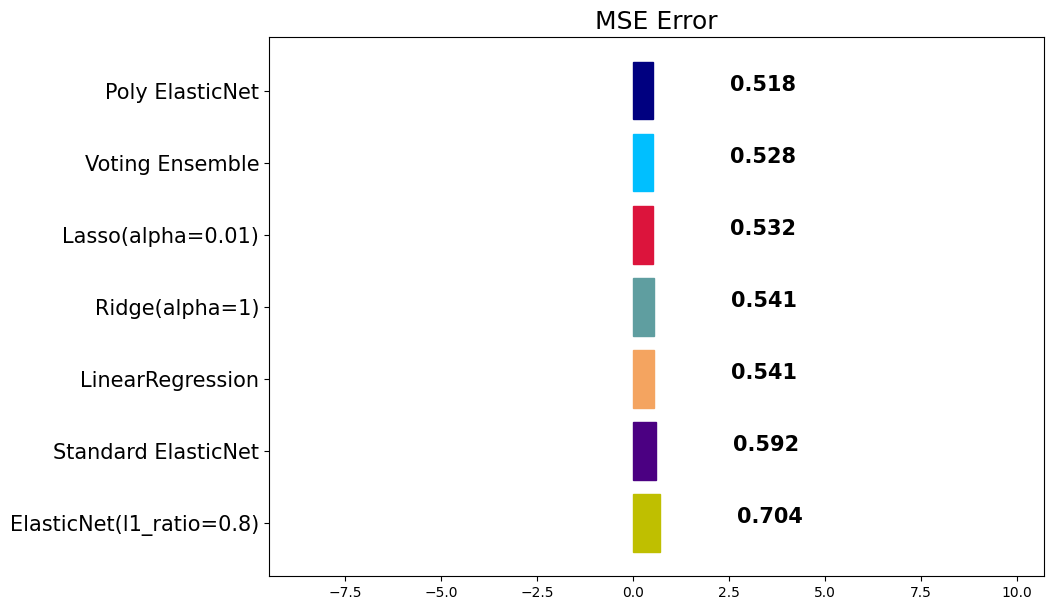

In [26]:
mse_eval('Voting Ensemble', voting_pred, y_test)

### 보팅 (Voting) - 분류 (Classification)

[자세한 내용 보기](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)

분류기 모델을 만들때, Voting 앙상블은 1가지의 **중요한 parameter**가 있습니다.

`voting` = {'hard', 'soft'}

**hard**로 설정한 경우

class를 0, 1로 분류 예측을 하는 이진 분류를 예로 들어 보겠습니다.

Hard Voting 방식에서는 결과 값에 대한 다수 class를 차용합니다.

classification을 예로 들어 보자면, 분류를 예측한 값이 1, 0, 0, 1, 1 이었다고 가정한다면 1이 3표, 0이 2표를 받았기 때문에 Hard Voting 방식에서는 1이 최종 값으로 예측을 하게 됩니다.

**soft**

soft vote 방식은 각각의 확률의 평균 값을 계산한다음에 가장 확률이 높은 값으로 확정짓게 됩니다.

가령 class 0이 나올 확률이 (0.4, 0.9, 0.9, 0.4, 0.4)이었고, class 1이 나올 확률이 (0.6, 0.1, 0.1, 0.6, 0.6) 이었다면, 

- class 0이 나올 최종 확률은 (0.4+0.9+0.9+0.4+0.4) / 5 = 0.44, 
- class 1이 나올 최종 확률은 (0.6+0.1+0.1+0.6+0.6) / 5 = 0.4 

가 되기 때문에 앞선 Hard Vote의 결과와는 다른 결과 값이 최종 으로 선출되게 됩니다.

In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [28]:
models = [
    ('Logi', LogisticRegression()), 
    ('ridge', RidgeClassifier())
]

voting 옵션에 대하여 지정합니다.

In [29]:
# Soft Voting은 Classifier에만 있다.
vc = VotingClassifier(models, voting='hard')

### 배깅(Bagging)

[자세한 내용 보기](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)

Bagging은 **Bootstrap Aggregating의 줄임말**입니다.

- Bootstrap = Sample(샘플) + Aggregating = 합산

Bootstrap은 여러 개의 dataset을 중첩을 허용하게 하여 샘플링하여 분할하는 방식

데이터 셋의 구성이 [1, 2, 3, 4, 5 ]로 되어 있다면,

1. group 1 = [1, 2, 3]
2. group 2 = [1, 3, 4]
3. group 3 = [2, 3, 5]

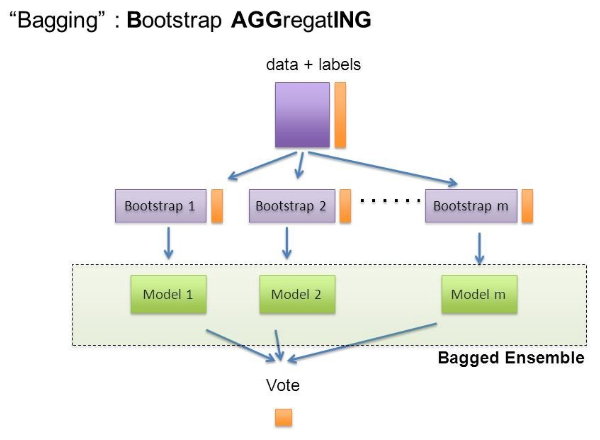

In [30]:
Image('https://teddylee777.github.io/images/2019-12-17/image-20191217015537872.png')

**Voting VS Bagging**

* **Voting**은 여러 알고리즘의 조합에 대한 앙상블
* **Bagging**은 하나의 단일 알고리즘에 대하여 여러 개의 샘플 조합으로 앙상블

**대표적인 Bagging 앙상블**
1. RandomForest
2. Bagging

### RandomForest

- DecisionTree(트리) + Bagging 앙상블 -> RandomForest
- 굉장히 인기있는 앙상블 모델
- 사용성이 쉽고, 성능도 우수함

In [31]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [32]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

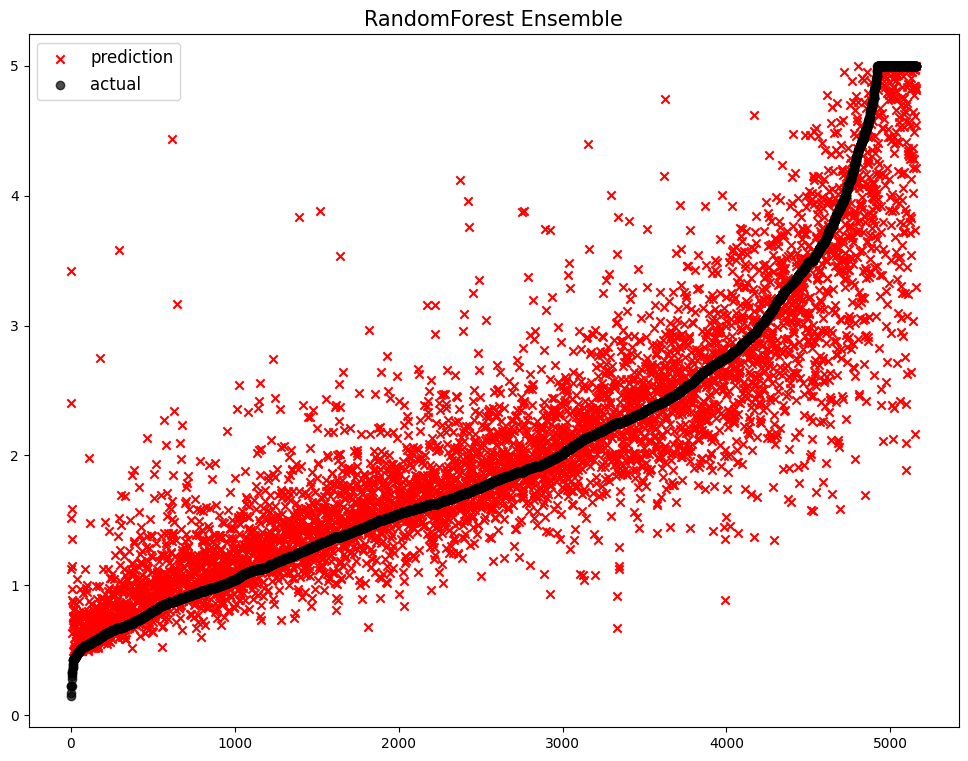

                      model       mse
0  ElasticNet(l1_ratio=0.8)  0.704071
1       Standard ElasticNet  0.592188
2          LinearRegression  0.541129
3            Ridge(alpha=1)  0.541047
4         Lasso(alpha=0.01)  0.532027
5           Voting Ensemble  0.527863
6           Poly ElasticNet  0.517807
7     RandomForest Ensemble  0.254764


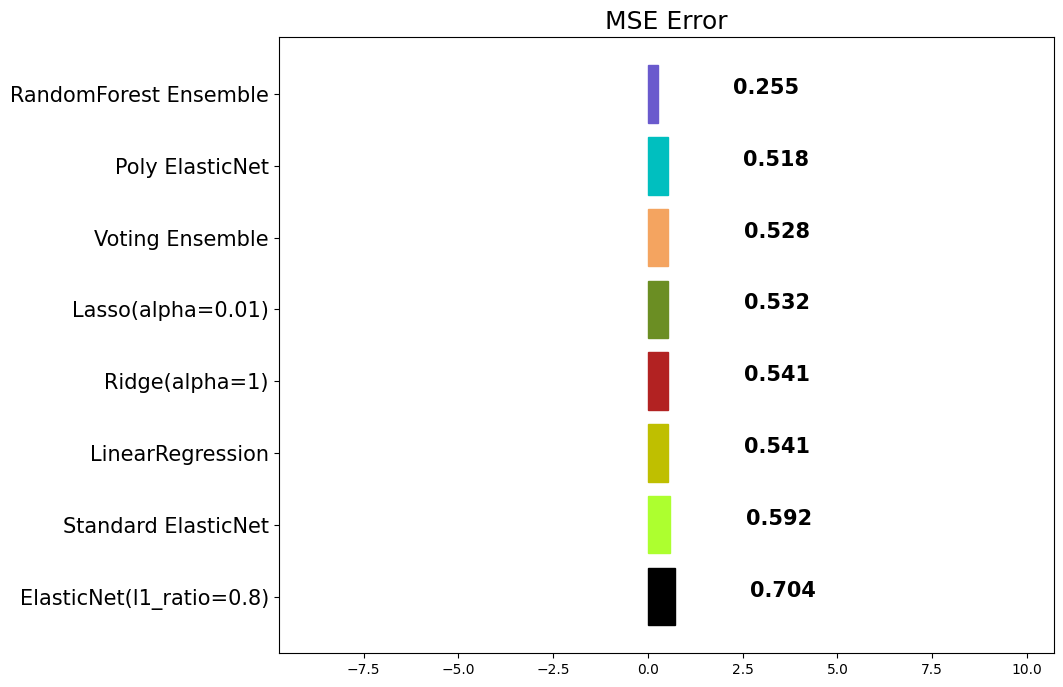

In [33]:
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble', rfr_pred, y_test)

**주요 Hyperparameter**

- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- max_depth: 깊어질 수 있는 최대 깊이. 과대적합 방지용
- n_estimators: 앙상블하는 트리의 갯수
- max_features: 최대로 사용할 feature의 갯수. 과대적합 방지용
- min_samples_split: 트리가 분할할 때 최소 샘플의 갯수. default=2. 과대적합 방지용

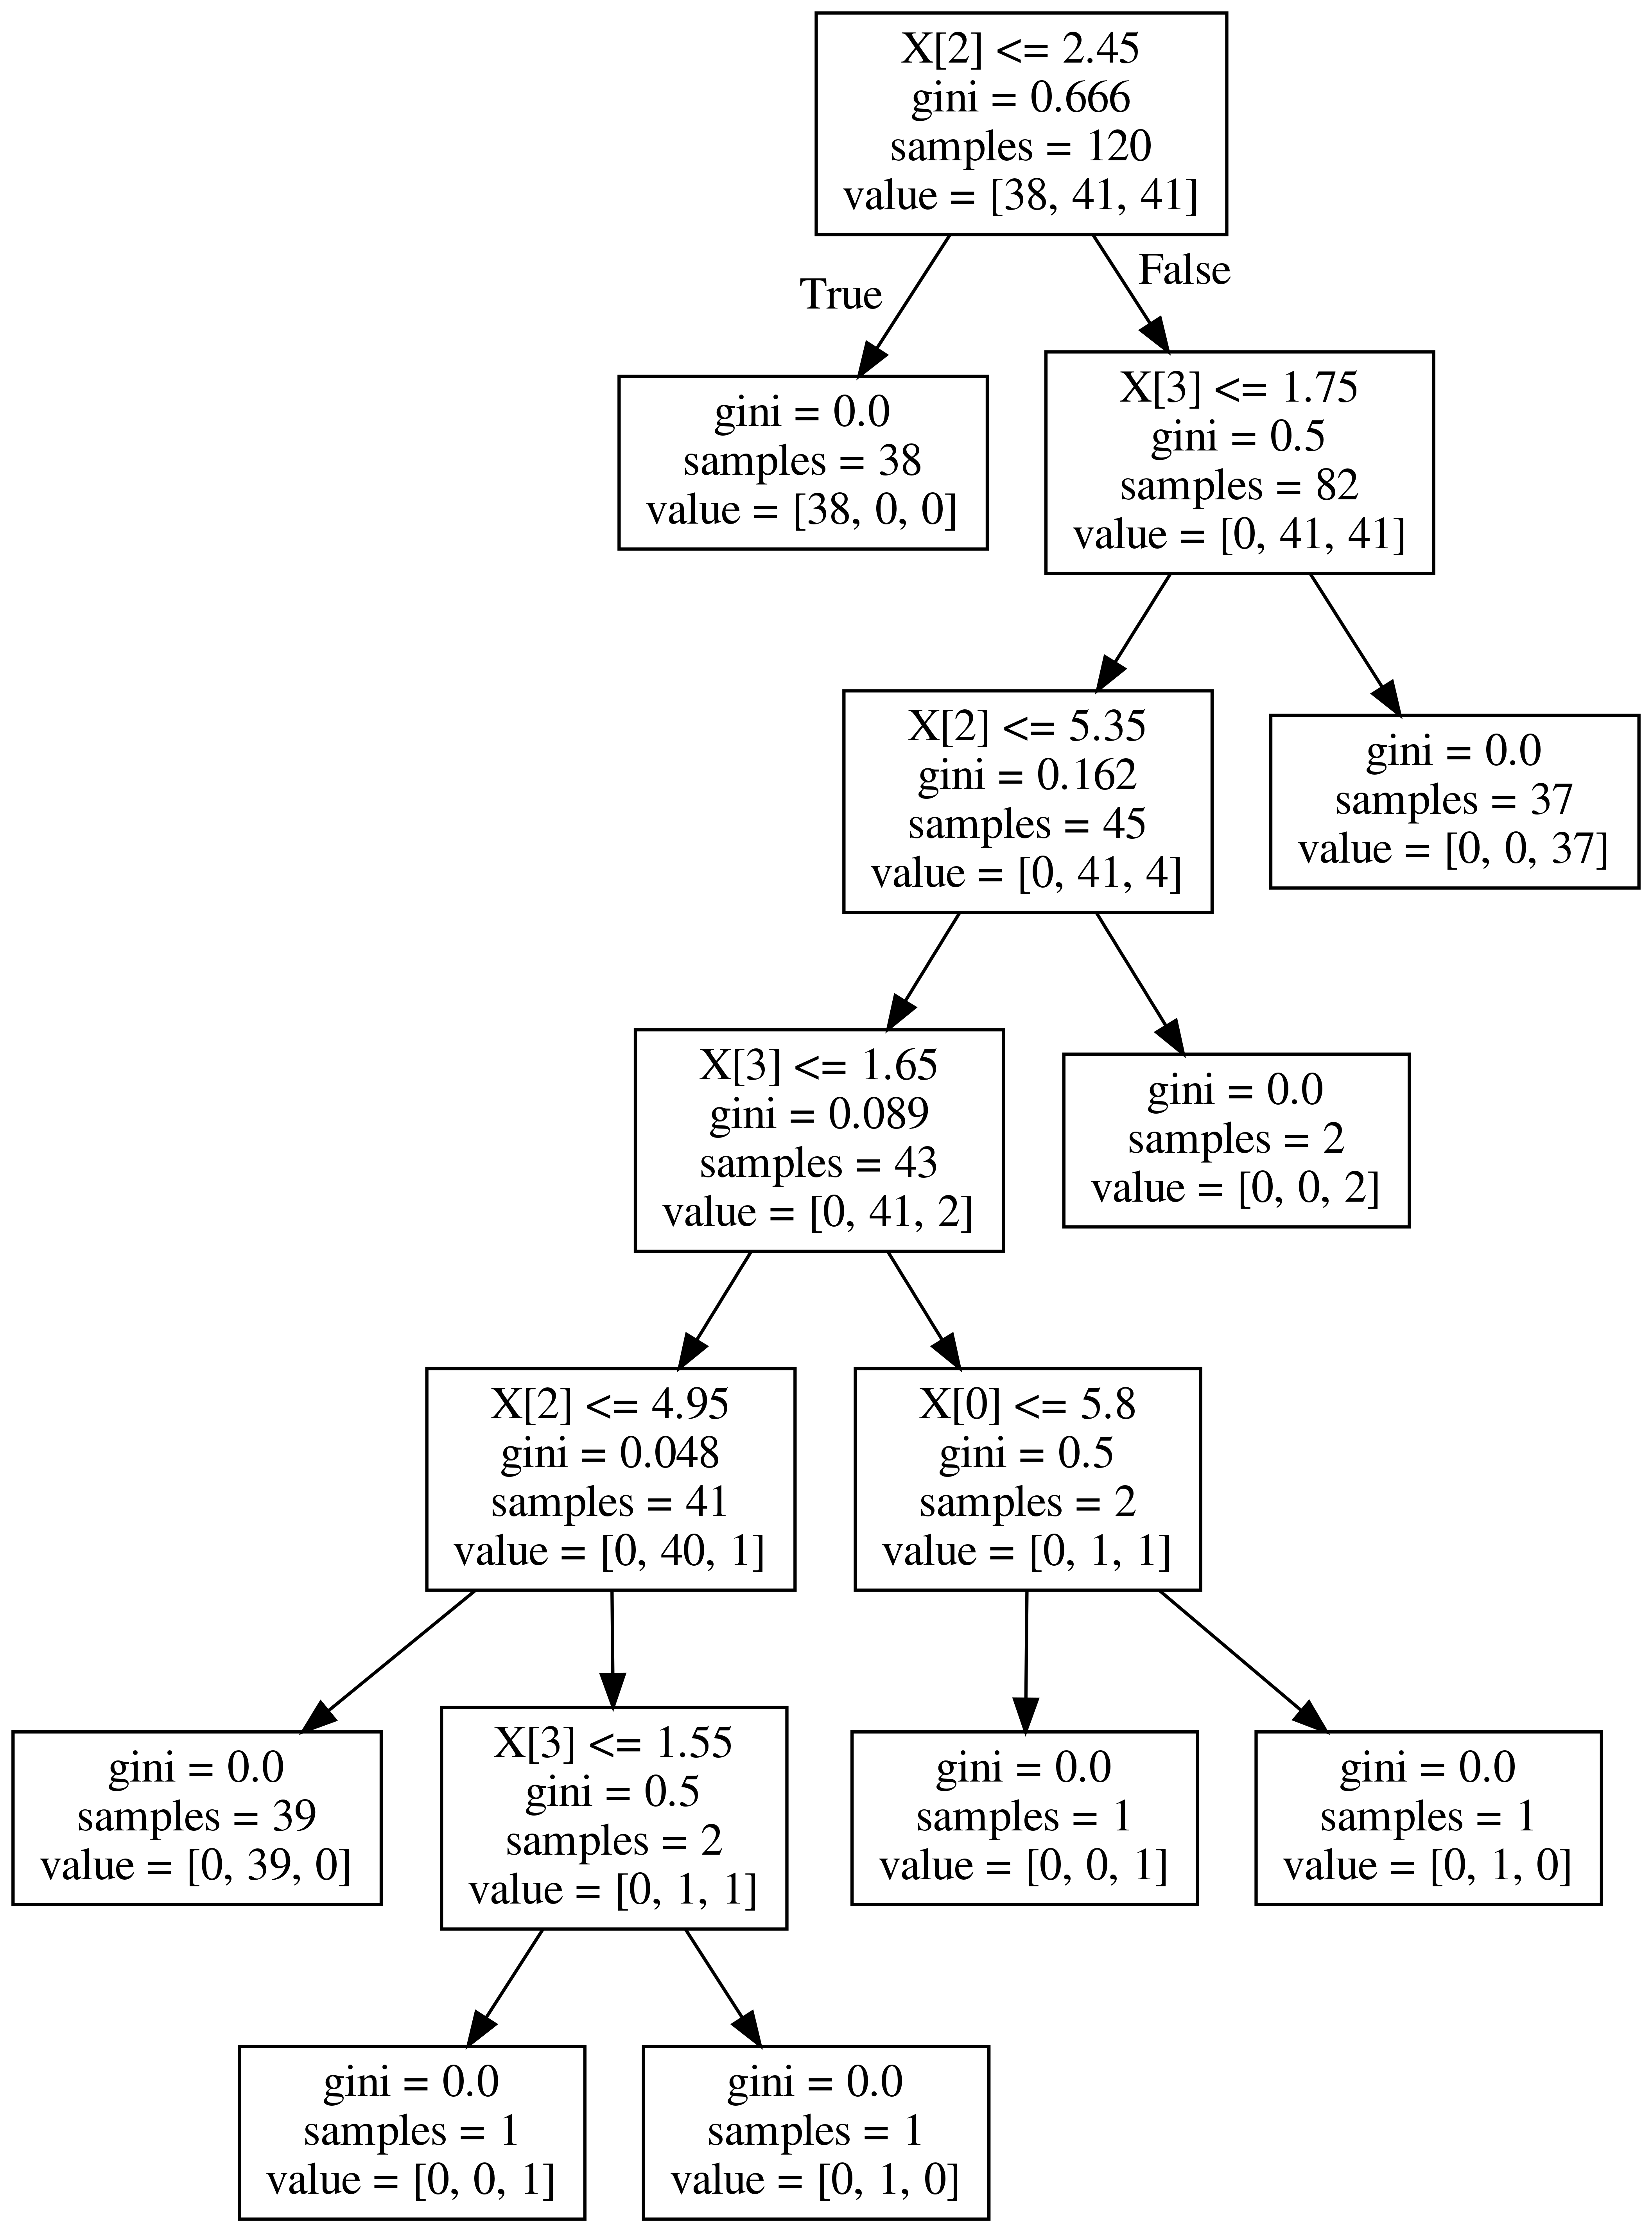

In [34]:
Image('https://teddylee777.github.io/images/2020-01-09/decistion-tree.png', width=600)

튜닝을 할 땐 반드시 `random_state` 값을 **고정**시킵니다!

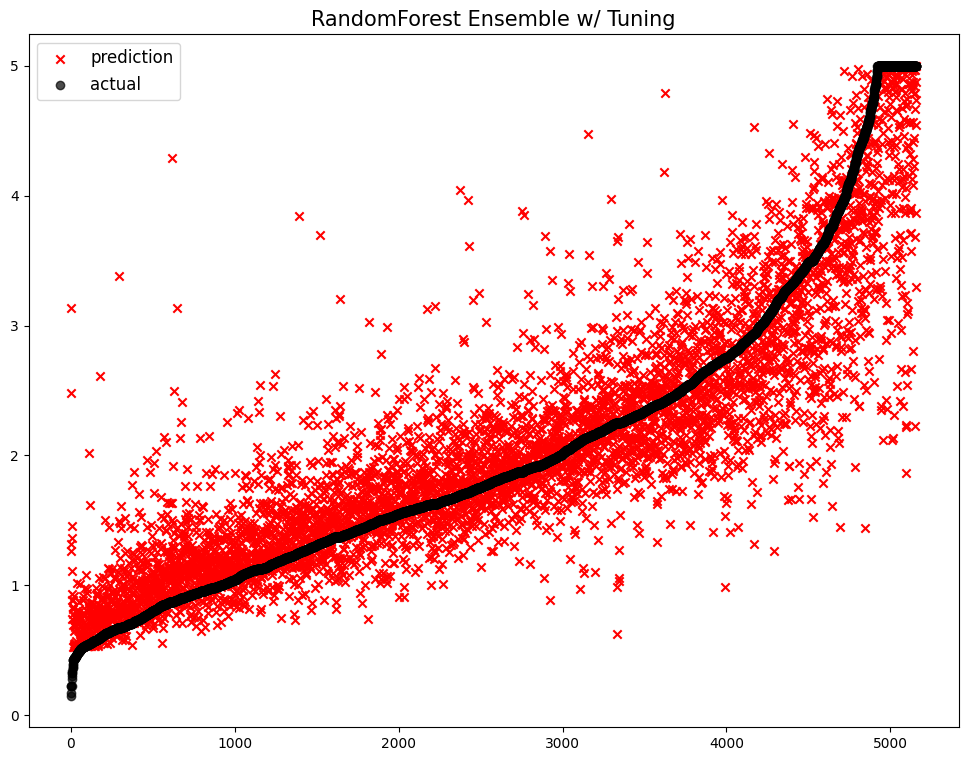

                             model       mse
0         ElasticNet(l1_ratio=0.8)  0.704071
1              Standard ElasticNet  0.592188
2                 LinearRegression  0.541129
3                   Ridge(alpha=1)  0.541047
4                Lasso(alpha=0.01)  0.532027
5                  Voting Ensemble  0.527863
6                  Poly ElasticNet  0.517807
7  RandomForest Ensemble w/ Tuning  0.268942
8            RandomForest Ensemble  0.254764


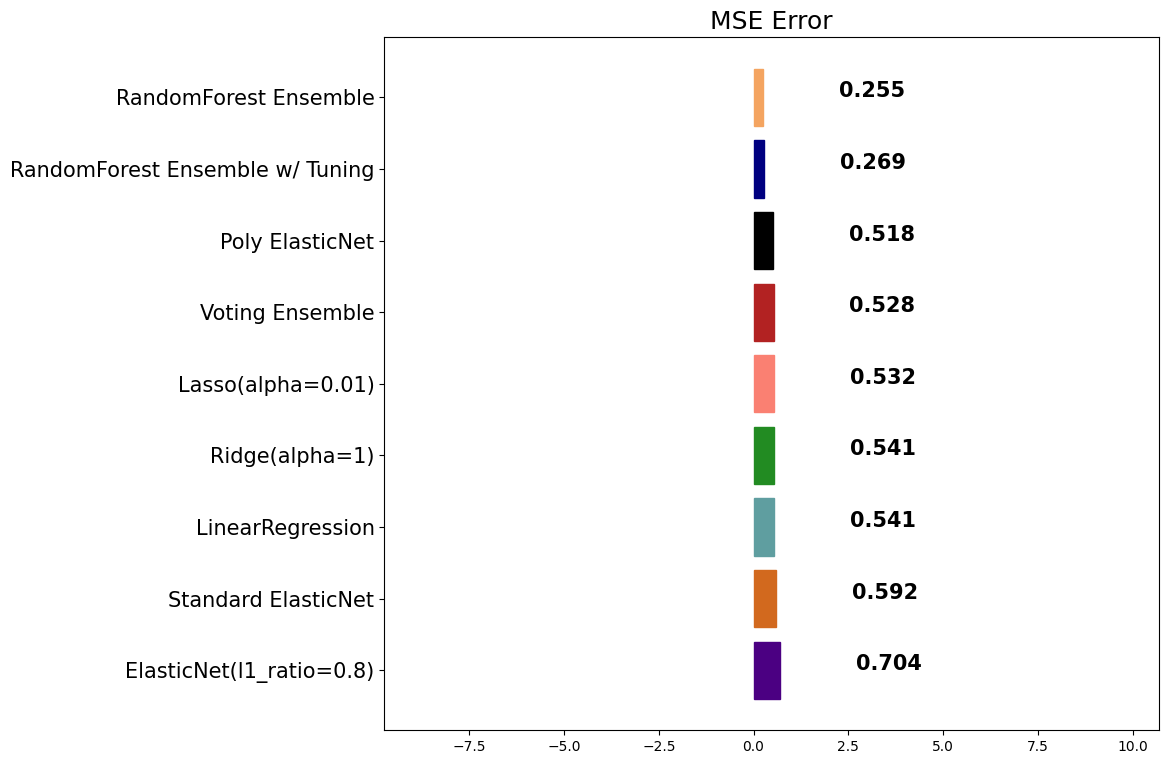

In [35]:
rfr = RandomForestRegressor(random_state=42, n_estimators=400, max_depth=12, max_features=0.9)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble w/ Tuning', rfr_pred, y_test)

In [36]:
from sklearn.model_selection import GridSearchCV

#rfr = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=7, max_features=0.9)

rfr = RandomForestRegressor(random_state = 42, n_jobs = -1)
params = { 'n_estimators' : [400, 500, 600, 700],
           'max_depth' : [8, 9, 10, 11, 12, 13]
            }
grid_rfr = GridSearchCV(rfr, param_grid=params, cv=3, refit=True)
grid_rfr.fit(x_train, y_train)

#mse_eval('RandomForest Ensemble w/ Tuning', rfr_pred, y_test)

# GridSearchCV 결과를 추출해 데이터 프레임으로 반환
scores_df = pd.DataFrame(grid_rfr.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

params  mean_test_score  rank_test_score  \
0    {'max_depth': 8, 'n_estimators': 400}         0.749808               21   
1    {'max_depth': 8, 'n_estimators': 500}         0.749787               23   
2    {'max_depth': 8, 'n_estimators': 600}         0.749788               22   
3    {'max_depth': 8, 'n_estimators': 700}         0.749714               24   
4    {'max_depth': 9, 'n_estimators': 400}         0.765264               17   
5    {'max_depth': 9, 'n_estimators': 500}         0.765199               19   
6    {'max_depth': 9, 'n_estimators': 600}         0.765229               18   
7    {'max_depth': 9, 'n_estimators': 700}         0.765131               20   
8   {'max_depth': 10, 'n_estimators': 400}         0.776070               15   
9   {'max_depth': 10, 'n_estimators': 500}         0.776076               14   
10  {'max_depth': 10, 'n_estimators': 600}         0.776168               13   
11  {'max_depth': 10, 'n_estimators': 700}         0.776046               16   
12  {'max_depth': 11, 'n_estimators': 400}         0.783800               12   
13  {'max_depth': 11, 'n_estimators': 500}         0.783876               10   
14  {'max_depth': 11, 'n_estimators': 600}         0.783881                9   
15  {'max_depth': 11, 'n_estimators': 700}         0.783869               11   
16  {'max_depth': 12, 'n_estimators': 400}         0.788847                8   
17  {'max_depth': 12, 'n_estimators': 500}         0.788938                7   
18  {'max_depth': 12, 'n_estimators': 600}         0.788992                5   
19  {'max_depth': 12, 'n_estimators': 700}         0.788963                6   
20  {'max_depth': 13, 'n_estimators': 400}         0.792207                4   
21  {'max_depth': 13, 'n_estimators': 500}         0.792332                1   
22  {'max_depth': 13, 'n_estimators': 600}         0.792297                3   
23  {'max_depth': 13, 'n_estimators': 700}         0.792322                2   

    split0_test_score  split1_test_score  split2_test_score  
0            0.741773           0.758292           0.749361  
1            0.741936           0.758184           0.749240  
2            0.741836           0.758371           0.749158  
3            0.741873           0.758122           0.749147  
4            0.757409           0.772588           0.765796  
5            0.757571           0.772408           0.765620  
6            0.757496           0.772769           0.765422  
7            0.757545           0.772525           0.765324  
8            0.769327           0.781811           0.777072  
9            0.769526           0.781771           0.776931  
10           0.769442           0.782201           0.776862  
11           0.769409           0.781850           0.776878  
12           0.778032           0.788384           0.784984  
13           0.778350           0.788384           0.784895  
14           0.778169           0.788700           0.784773  
15           0.778273           0.788462           0.784873  
16           0.783943           0.792353           0.790246  
17           0.784141           0.792396           0.790276  
18           0.783967           0.792736           0.790272  
19           0.784138           0.792415           0.790336  
20           0.787965           0.794855           0.793801  
21           0.788289           0.795020           0.793686  
22           0.788029           0.795324           0.793537  
23           0.788223           0.795004           0.793738

In [37]:
print('GridSearch 최적 파라미터: ', grid_rfr.best_params_)
print('GridSearch 최고 점수: ', grid_rfr.best_score_)

GridSearch 최적 파라미터:  {'max_depth': 13, 'n_estimators': 500}
GridSearch 최고 점수:  0.7923318113869611


### 부스팅 (Boosting)

[자세한 내용 보기]('https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3')

약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 **가중치를 부여해 오차를 보완**해 나가는 방식입니다.

**장점** 
- 성능이 매우 우수하다 (Lgbm, XGBoost)

**단점**
- 부스팅 알고리즘의 특성상 계속 약점(오분류/잔차)을 보완하려고 하기 때문에 **잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감**할 수 있다
- 다른 앙상블 대비 **학습 시간이 오래걸린다는 단점**이 존재

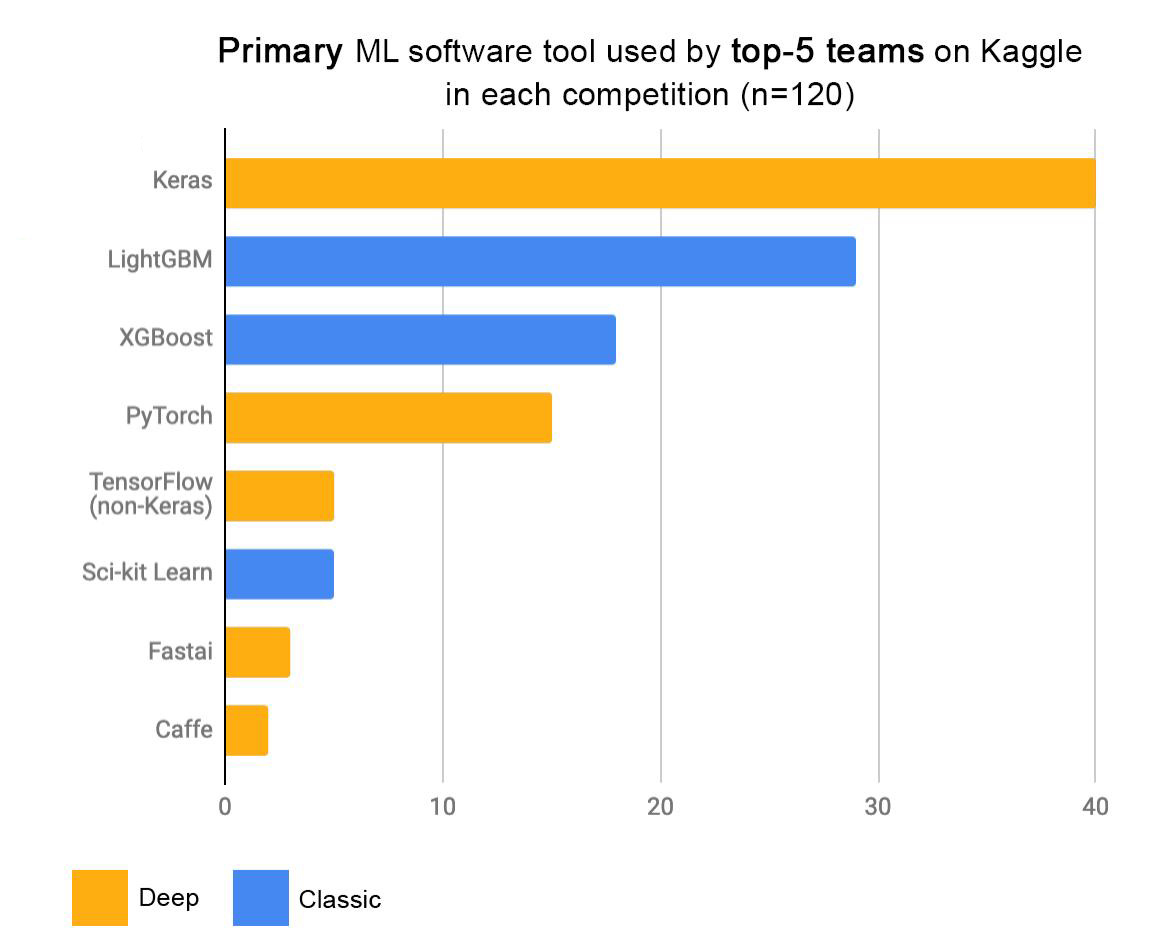

In [38]:
Image('https://keras.io/img/graph-kaggle-1.jpeg', width=800)

**대표적인 Boosting 앙상블**
1. AdaBoost
2. GradientBoost
3. LightGBM (LGBM)
4. XGBoost

### GradientBoost

인기가 높은 또 하나의 부스팅 알고리즘으로, 에이다 부스트처럼 그레디언트 부스팅은 앙상블에 이전까지의 오차를 보정하도록 예측기를 순차적으로 추가한다.<br>  
하지만, 에이다부스트처럼 반복마다 샘플의 가중치를 수정하는 대신 이전 예측치가 만든 잔여 오차(residual error)에 새로운 예측기를 학습시킨다.

결정 트리를 기반 예측기로 사용하는 간단한 회귀 문제를 풀어보자. 이를 **그레디언트 트리 부스팅** 또는 **그레디언트 부스티드 회귀 트리**라고 한다.<br>

## 먼저 **DecisionTreeRegressor**를 활용하여 GradientBoost를 만들어 보자.

In [39]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [41]:
# 첫 번째 예측기에서 생긴 잔여 오차에 두 번째 DecisionTreeRegressor를 훈련시킨다.
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [42]:
# 두 번째 예측기가 만든 잔여 오차에 세 번째 회귀 모델을 훈련시킨다.
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [43]:
X_new = np.array([[0.8]])

In [44]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

In [45]:
import os

# 함수명 변경: plot_predictions -> plot_tree_predictions (기존 mse_eval용 함수와 충돌 방지)
def plot_tree_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)


# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

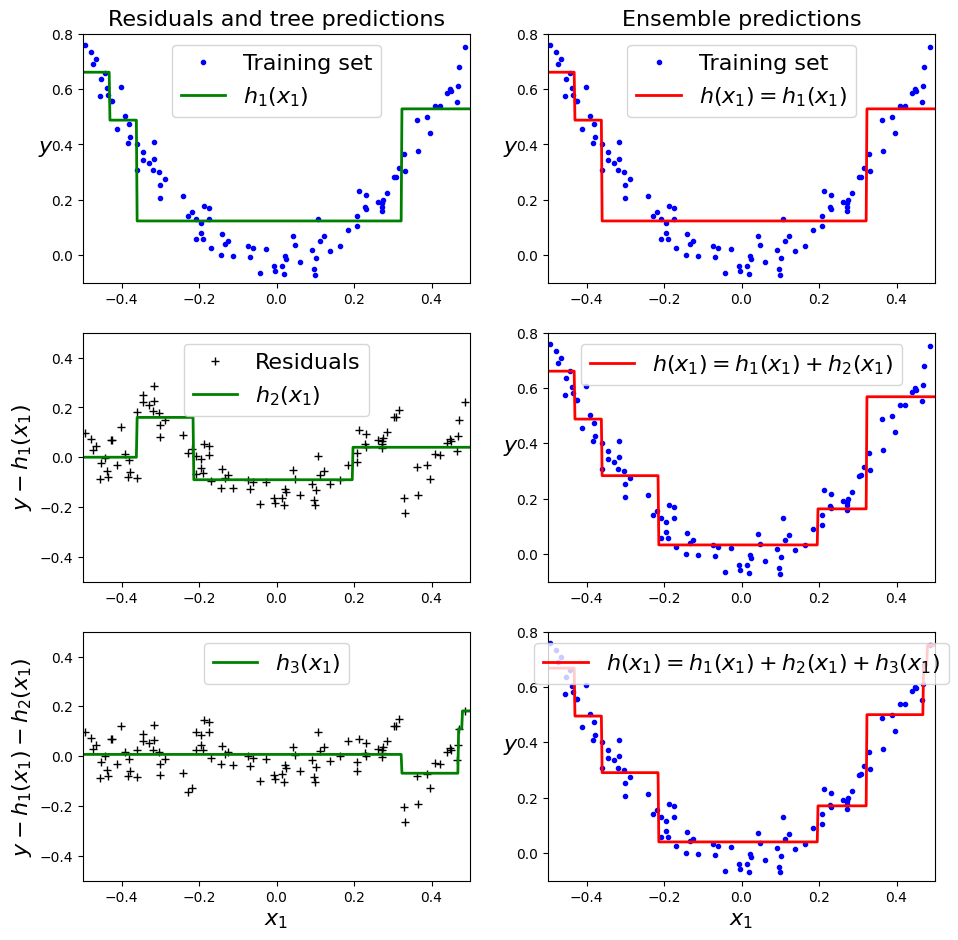

In [46]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_tree_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_tree_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_tree_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_tree_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_tree_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_tree_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

#save_fig("gradient_boosting_plot")

plt.show()

위의 그림에서 왼쪽 열은 이 세트리의 예측이고, 오른쪽 열은 앙상블의 예측이다. 

* 첫 번째 행에서는 앙상블에 트리가 하나만 있어서 첫 번째 트리의 예측과 완전히 같다. 

* 두 번째 행에서는 새로운 트리가 첫 번째 트리의 잔여 오차에 대해 학습되었다. 오른쪽의 앙상블 예측이 두 개의 트리 예측의 합과 같은 것을 볼 수 있다. 

* 비슷하게 세 번째 행에서는 또 다른 트리가 두 번째 트리의 잔여 오차에 훈련 되었다. 트리가 앙상블에 추가될수록 앙상블의 예측이 점차 좋아지는 것을 볼 수 있다.

사이킷런의 **GradientBoostingRegressor**를 사용하면 GBRT 앙상블을 간단하게 훈련시킬 수 있다. 트리 수(n_estimators)와 같이 앙상블의 훈련을 제어하는 매개변수는 물론 **RandomForestRegressor**와 아주 비슷하게 결정 트리의 성장을 제어하는 매개변수(max_depth, min_samples_leaf)를 가지고 있다. 다음은 이전에 만든 것과 같은 앙상블을 만드는 코드이다.

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [48]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

그림 저장: gbrt_learning_rate_plot


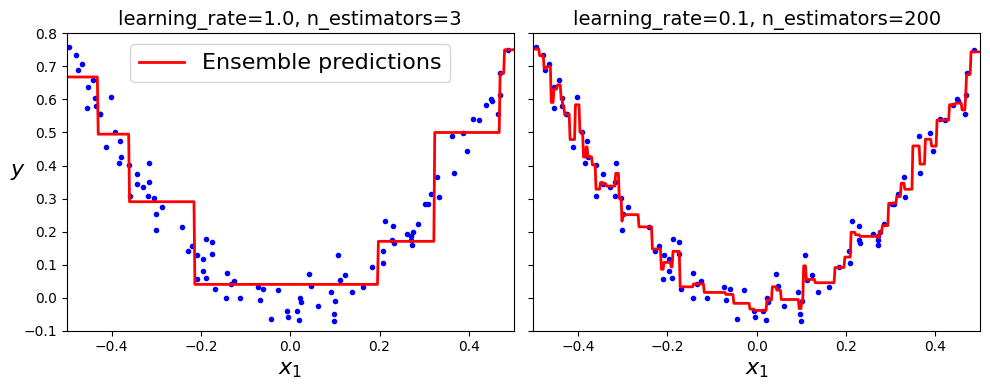

In [49]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axs[0])
plot_tree_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axs[1])
plot_tree_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

save_fig("gbrt_learning_rate_plot")
plt.show()

[사이킷런 공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html?highlight=gradient%20boost#sklearn.ensemble.GradientBoostingRegressor)

In [50]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

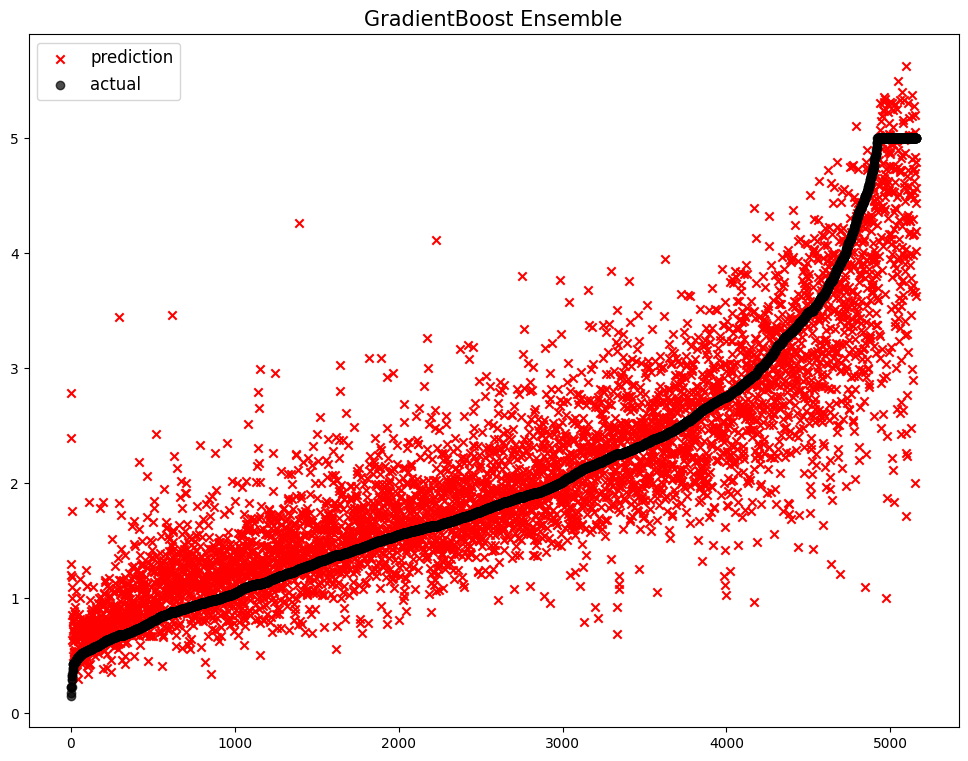

                             model       mse
0         ElasticNet(l1_ratio=0.8)  0.704071
1              Standard ElasticNet  0.592188
2                 LinearRegression  0.541129
3                   Ridge(alpha=1)  0.541047
4                Lasso(alpha=0.01)  0.532027
5                  Voting Ensemble  0.527863
6                  Poly ElasticNet  0.517807
7           GradientBoost Ensemble  0.289523
8  RandomForest Ensemble w/ Tuning  0.268942
9            RandomForest Ensemble  0.254764


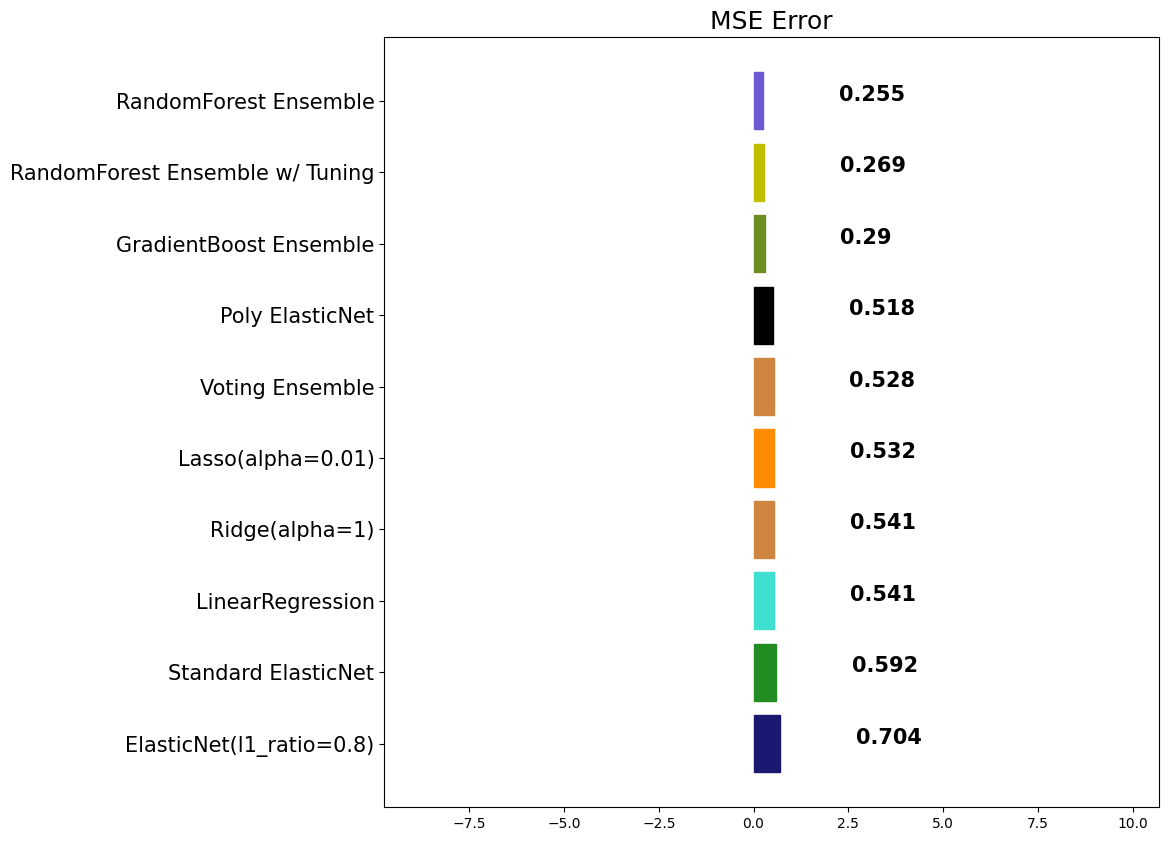

In [51]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble', gbr_pred, y_test)

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- subsample: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용
- min_samples_split: 노드 분할시 최소 샘플의 갯수. default=2. 과대적합 방지용

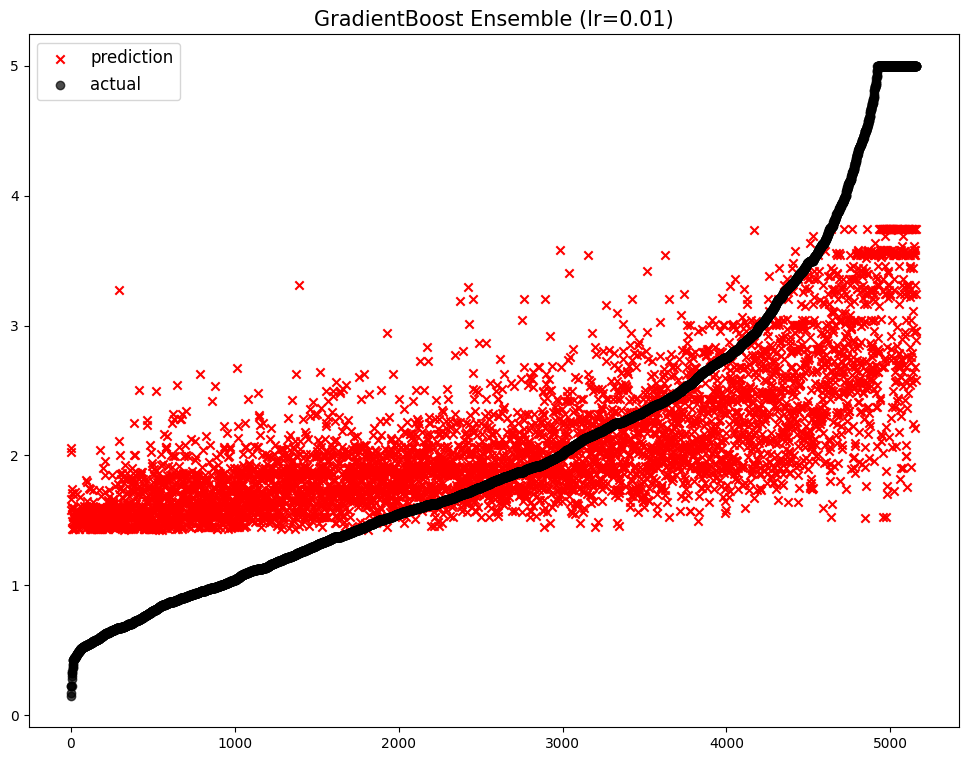

                               model       mse
0           ElasticNet(l1_ratio=0.8)  0.704071
1   GradientBoost Ensemble (lr=0.01)  0.663872
2                Standard ElasticNet  0.592188
3                   LinearRegression  0.541129
4                     Ridge(alpha=1)  0.541047
5                  Lasso(alpha=0.01)  0.532027
6                    Voting Ensemble  0.527863
7                    Poly ElasticNet  0.517807
8             GradientBoost Ensemble  0.289523
9    RandomForest Ensemble w/ Tuning  0.268942
10             RandomForest Ensemble  0.254764


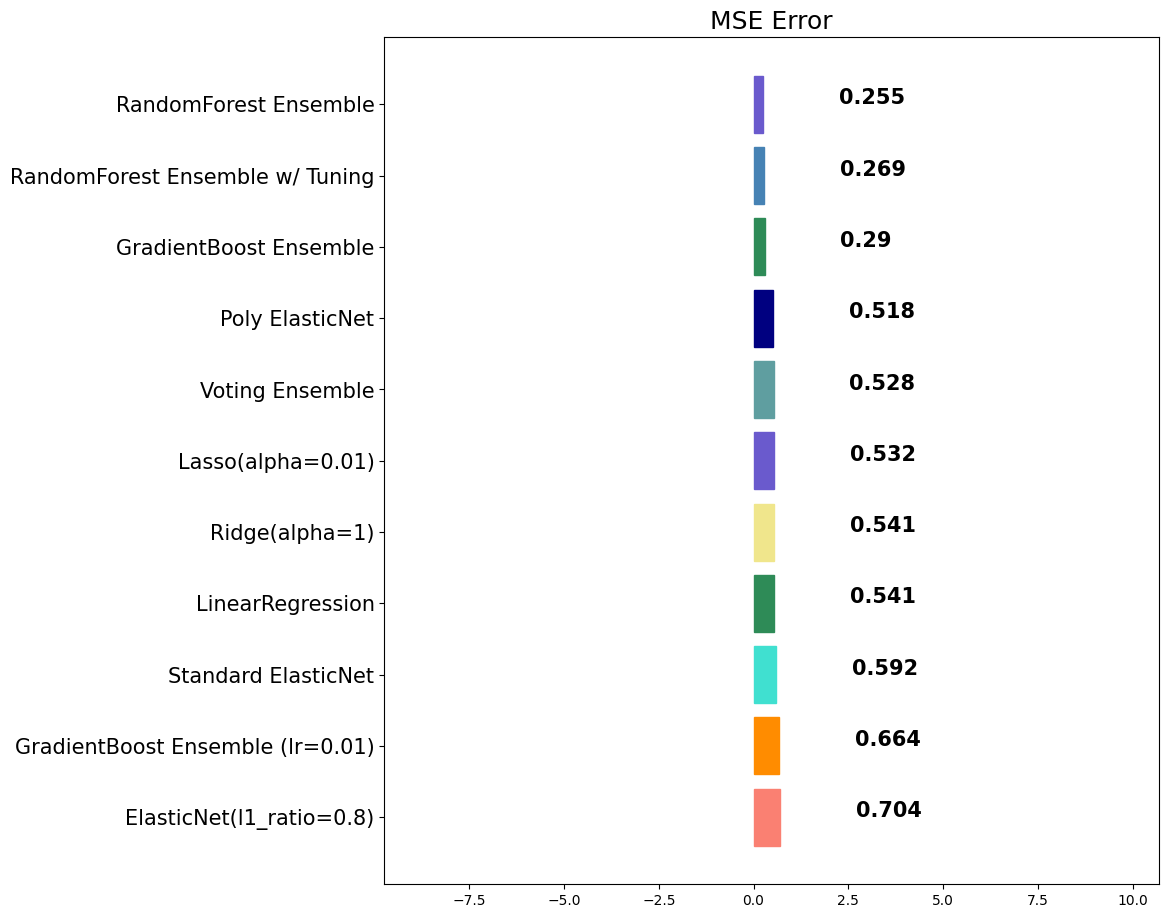

In [52]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.01)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble (lr=0.01)', gbr_pred, y_test)

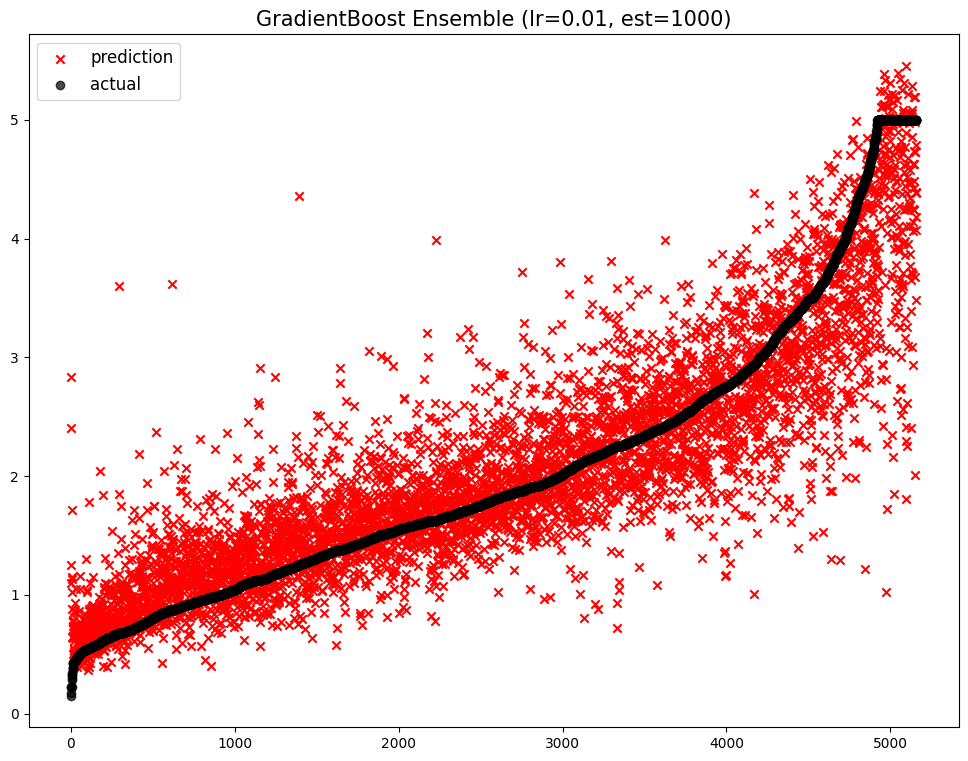

                                         model       mse
0                     ElasticNet(l1_ratio=0.8)  0.704071
1             GradientBoost Ensemble (lr=0.01)  0.663872
2                          Standard ElasticNet  0.592188
3                             LinearRegression  0.541129
4                               Ridge(alpha=1)  0.541047
5                            Lasso(alpha=0.01)  0.532027
6                              Voting Ensemble  0.527863
7                              Poly ElasticNet  0.517807
8   GradientBoost Ensemble (lr=0.01, est=1000)  0.289908
9                       GradientBoost Ensemble  0.289523
10             RandomForest Ensemble w/ Tuning  0.268942
11                       RandomForest Ensemble  0.254764


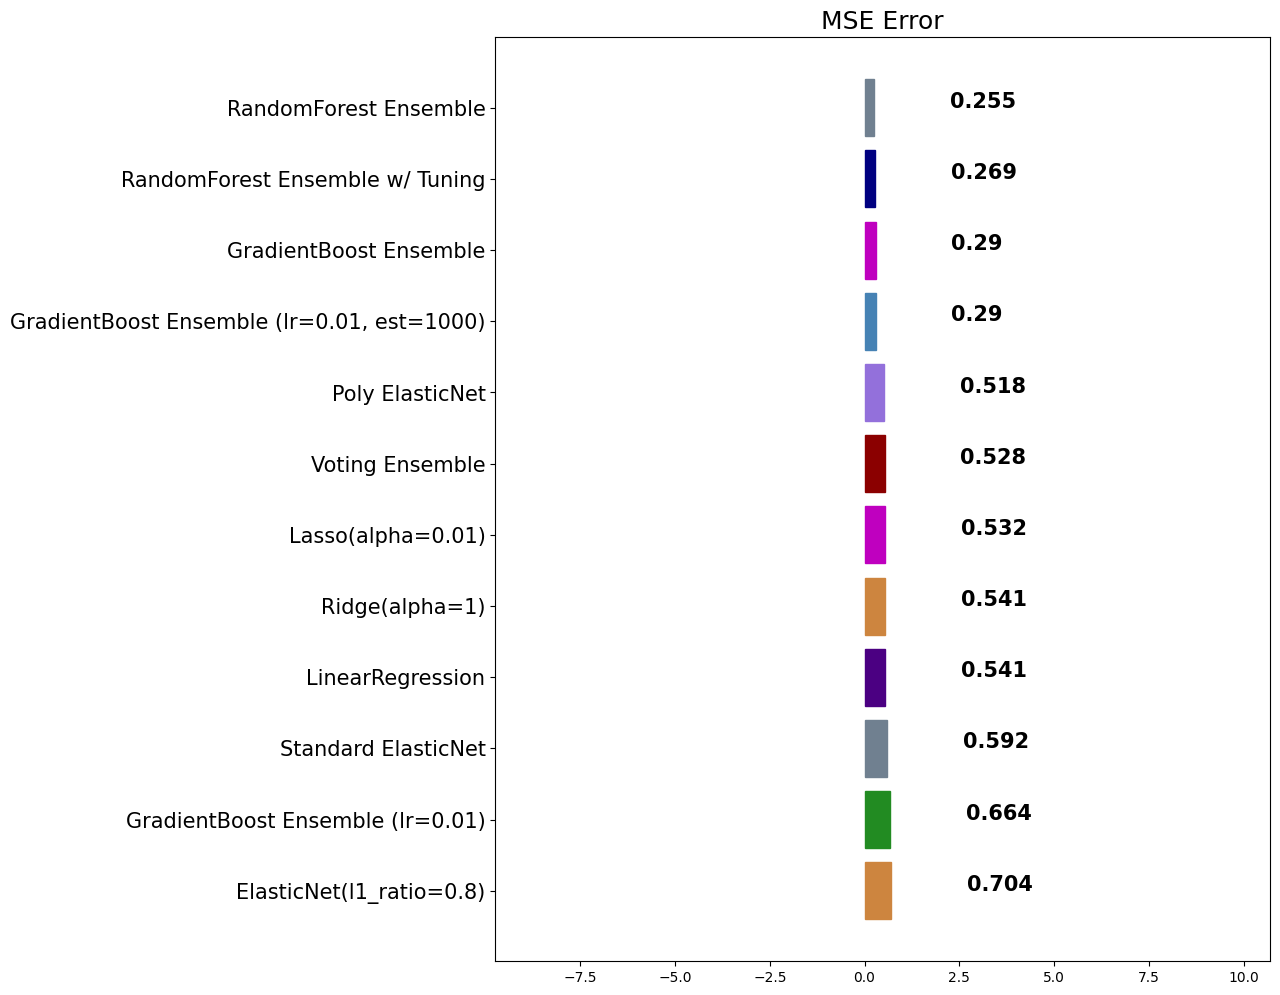

In [53]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.01, n_estimators=1000)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble (lr=0.01, est=1000)', gbr_pred, y_test)

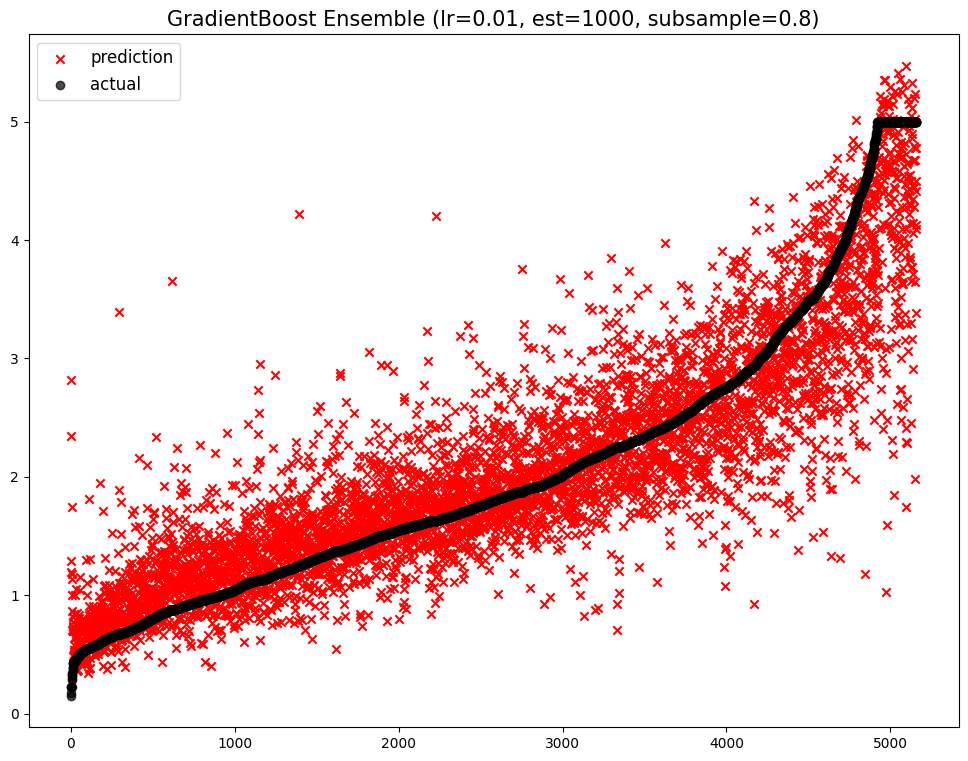

                                                model       mse
0                            ElasticNet(l1_ratio=0.8)  0.704071
1                    GradientBoost Ensemble (lr=0.01)  0.663872
2                                 Standard ElasticNet  0.592188
3                                    LinearRegression  0.541129
4                                      Ridge(alpha=1)  0.541047
5                                   Lasso(alpha=0.01)  0.532027
6                                     Voting Ensemble  0.527863
7                                     Poly ElasticNet  0.517807
8          GradientBoost Ensemble (lr=0.01, est=1000)  0.289908
9                              GradientBoost Ensemble  0.289523
10  GradientBoost Ensemble (lr=0.01, est=1000, sub...  0.287769
11                    RandomForest Ensemble w/ Tuning  0.268942
12                              RandomForest Ensemble  0.254764


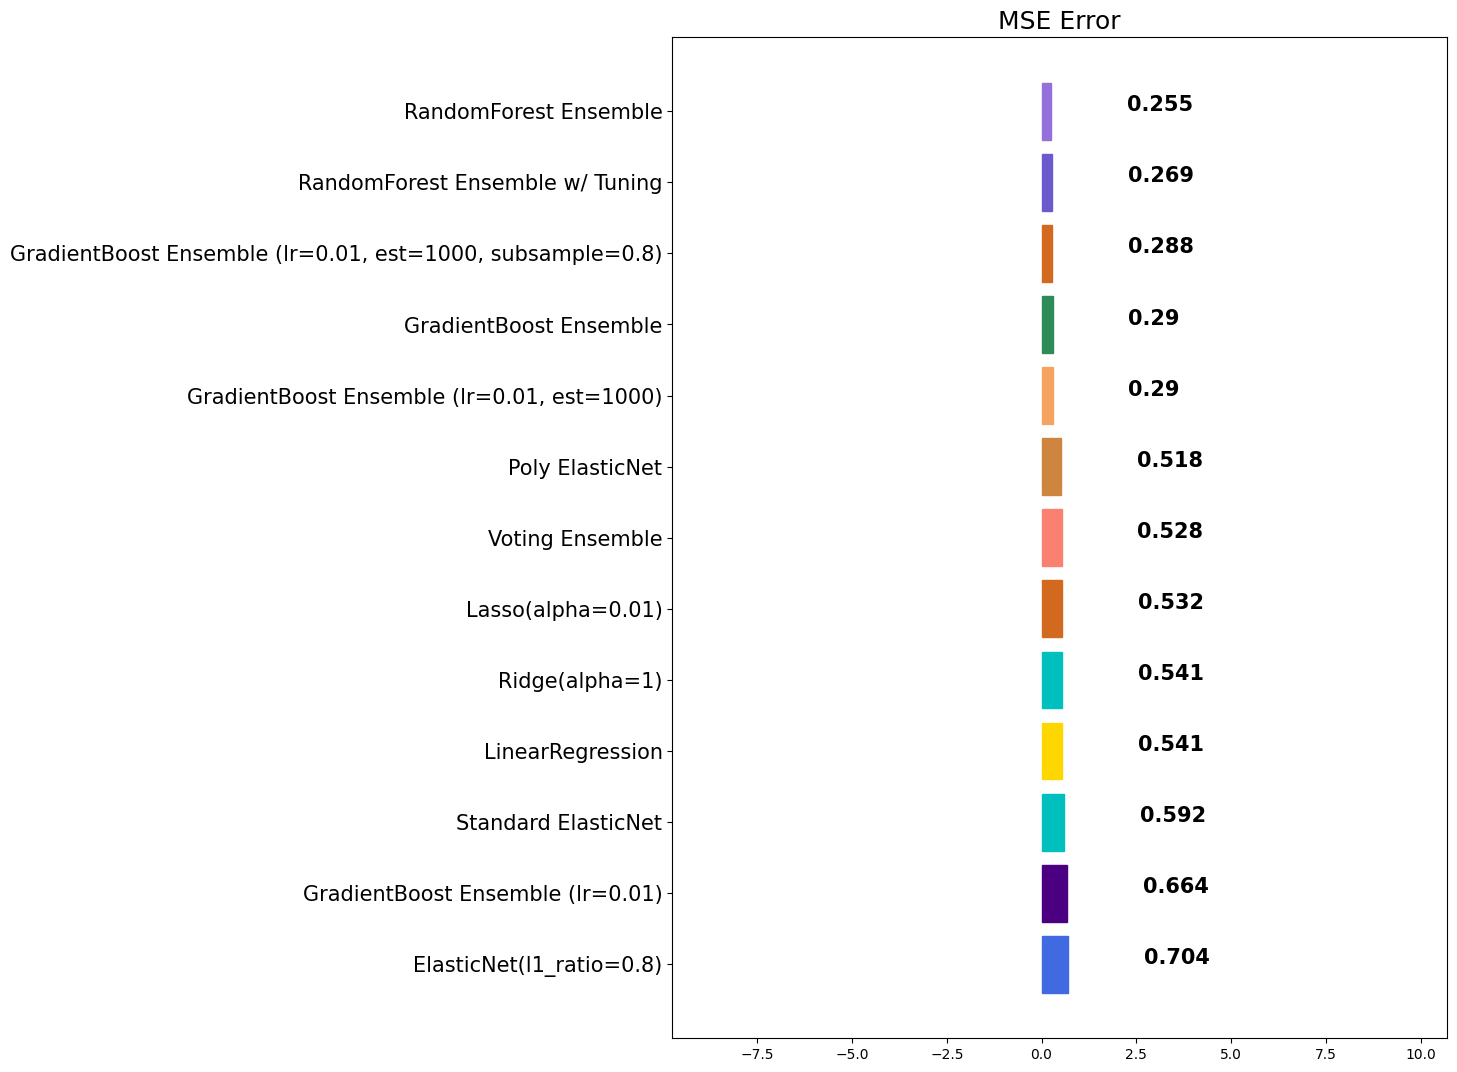

In [54]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.8)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble (lr=0.01, est=1000, subsample=0.8)', gbr_pred, y_test)

### XGBoost
e**X**treme **G**radient **B**oosting

[공식 도큐먼트](https://xgboost.readthedocs.io/en/latest/)

**주요 특징**
- scikit-learn 패키지가 아닙니다.
- 성능이 우수함
- GBM보다는 빠르고 성능도 향상되었습니다.
- 여전히 학습시간이 매우 느리다

In [55]:
from xgboost import XGBRegressor, XGBClassifier

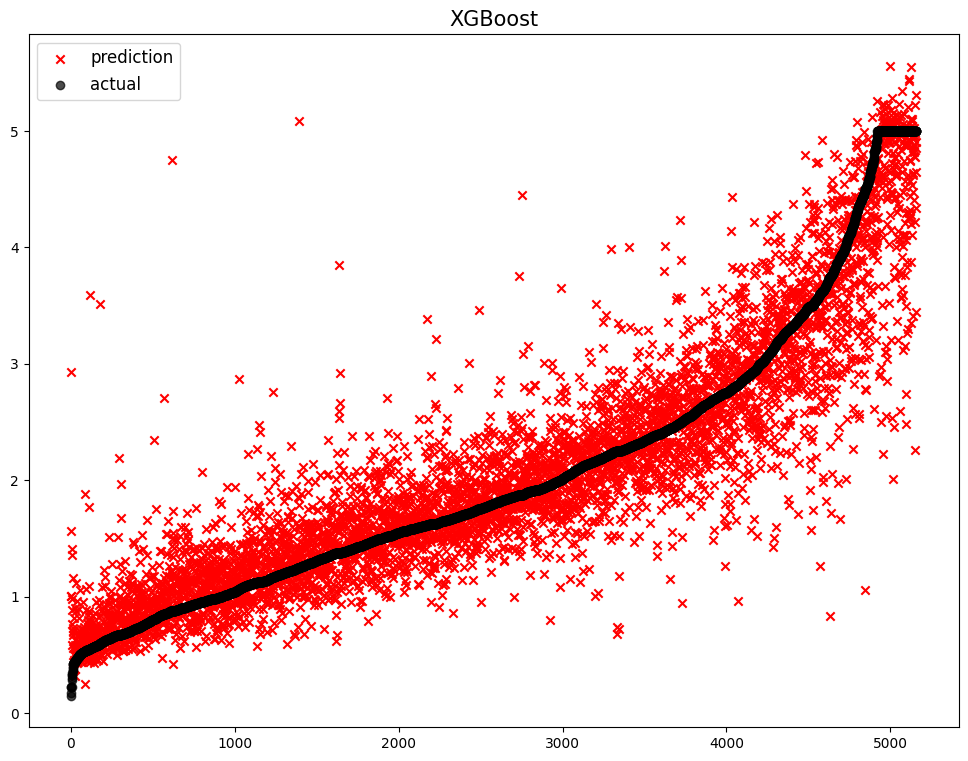

                                                model       mse
0                            ElasticNet(l1_ratio=0.8)  0.704071
1                    GradientBoost Ensemble (lr=0.01)  0.663872
2                                 Standard ElasticNet  0.592188
3                                    LinearRegression  0.541129
4                                      Ridge(alpha=1)  0.541047
5                                   Lasso(alpha=0.01)  0.532027
6                                     Voting Ensemble  0.527863
7                                     Poly ElasticNet  0.517807
8          GradientBoost Ensemble (lr=0.01, est=1000)  0.289908
9                              GradientBoost Ensemble  0.289523
10  GradientBoost Ensemble (lr=0.01, est=1000, sub...  0.287769
11                    RandomForest Ensemble w/ Tuning  0.268942
12                              RandomForest Ensemble  0.254764
13                                            XGBoost  0.216141


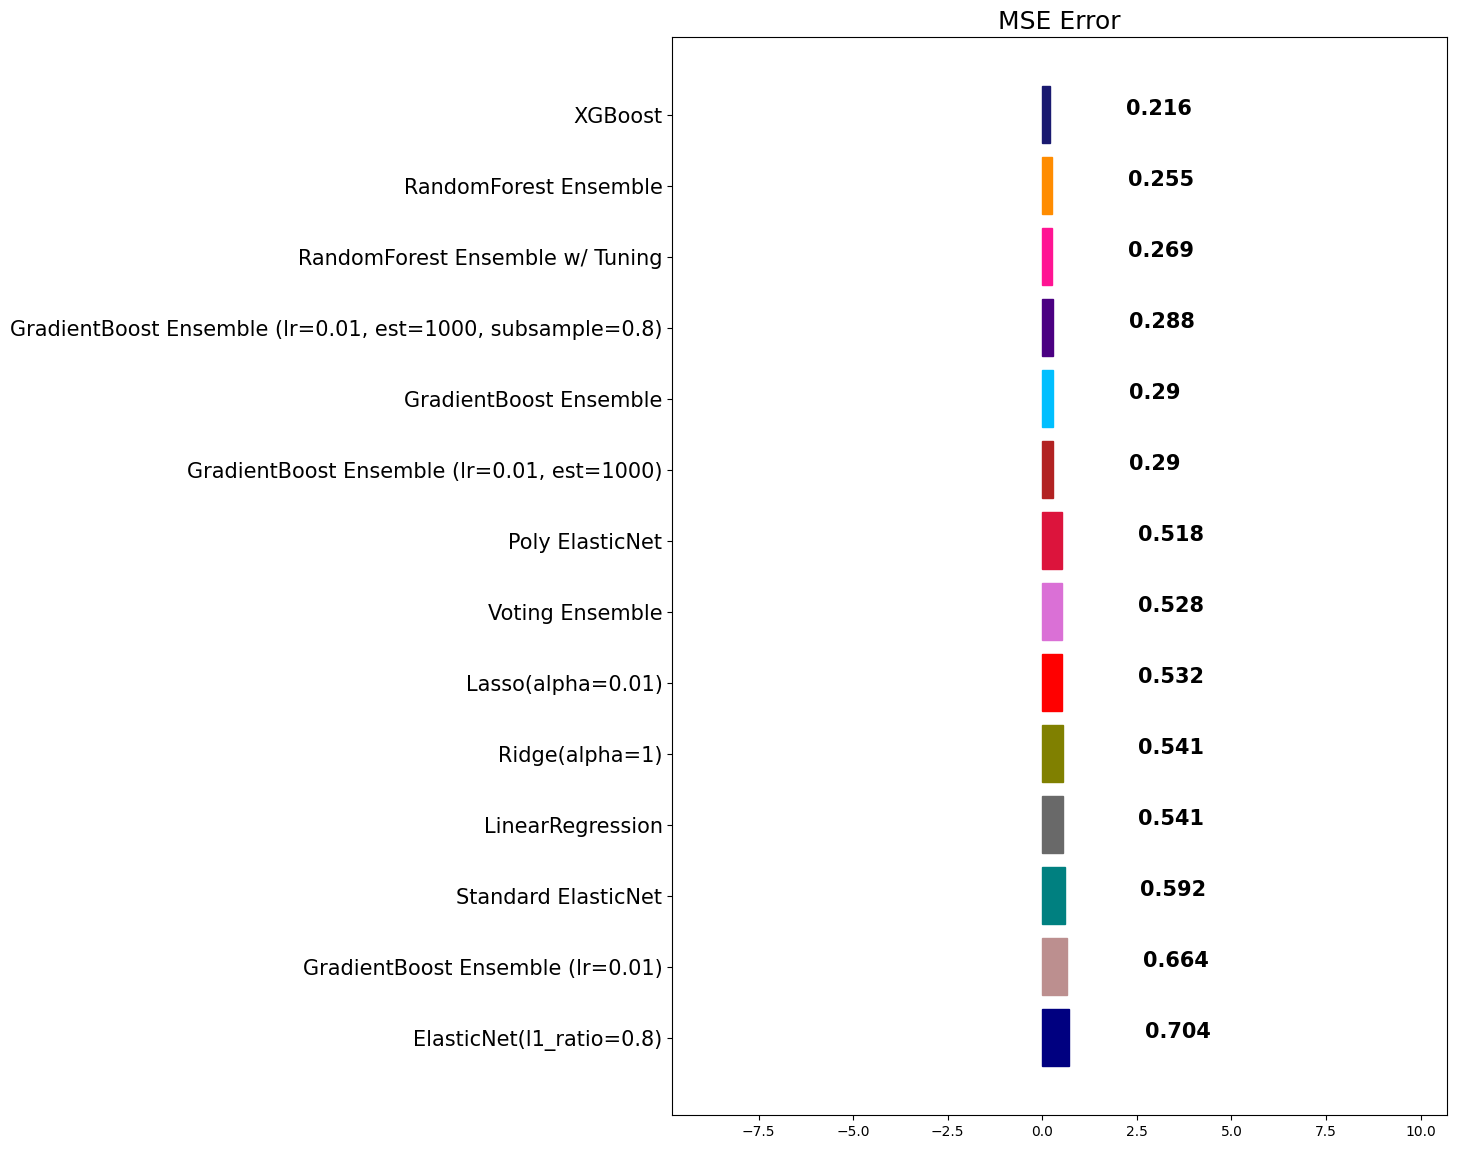

In [56]:
xgb = XGBRegressor(random_state=42)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost', xgb_pred, y_test)

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- max_depth: 트리의 깊이. 과대적합 방지용. default=3. 
- subsample: 샘플 사용 비율. 과대적합 방지용. default=1.0
- max_features: 최대로 사용할 feature의 비율. 과대적합 방지용. default=1.0

c:\Users\park0\miniconda3\envs\myDS\Lib\site-packages\xgboost\training.py:199: UserWarning: [08:18:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "max_features" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


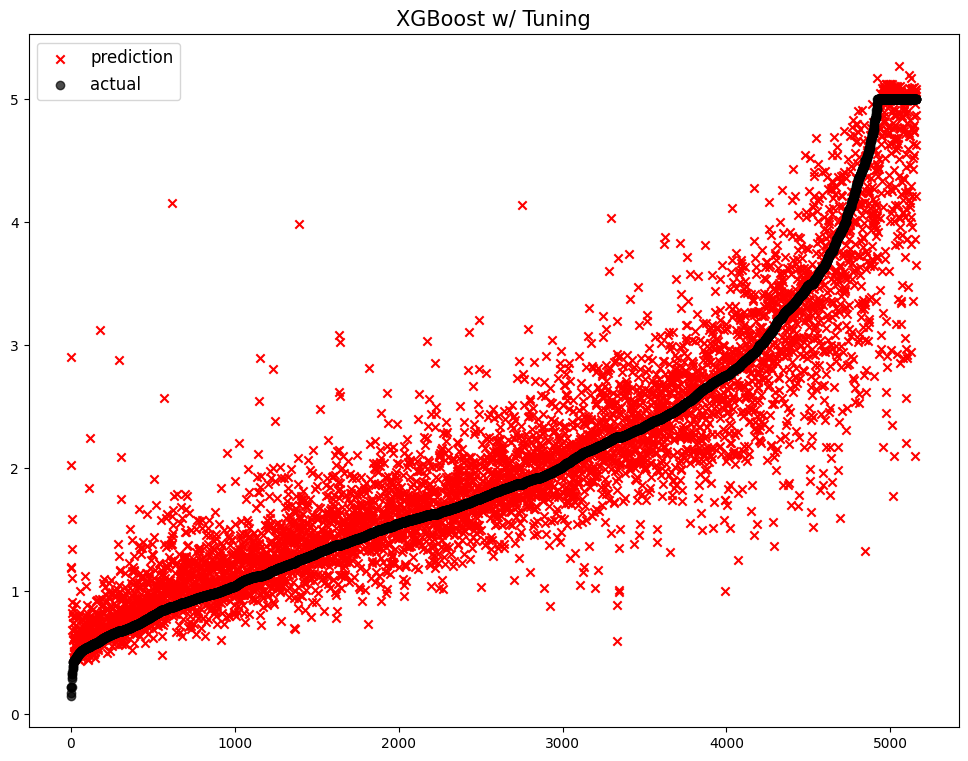

                                                model       mse
0                            ElasticNet(l1_ratio=0.8)  0.704071
1                    GradientBoost Ensemble (lr=0.01)  0.663872
2                                 Standard ElasticNet  0.592188
3                                    LinearRegression  0.541129
4                                      Ridge(alpha=1)  0.541047
5                                   Lasso(alpha=0.01)  0.532027
6                                     Voting Ensemble  0.527863
7                                     Poly ElasticNet  0.517807
8          GradientBoost Ensemble (lr=0.01, est=1000)  0.289908
9                              GradientBoost Ensemble  0.289523
10  GradientBoost Ensemble (lr=0.01, est=1000, sub...  0.287769
11                    RandomForest Ensemble w/ Tuning  0.268942
12                              RandomForest Ensemble  0.254764
13                                            XGBoost  0.216141
14                                  XGBo

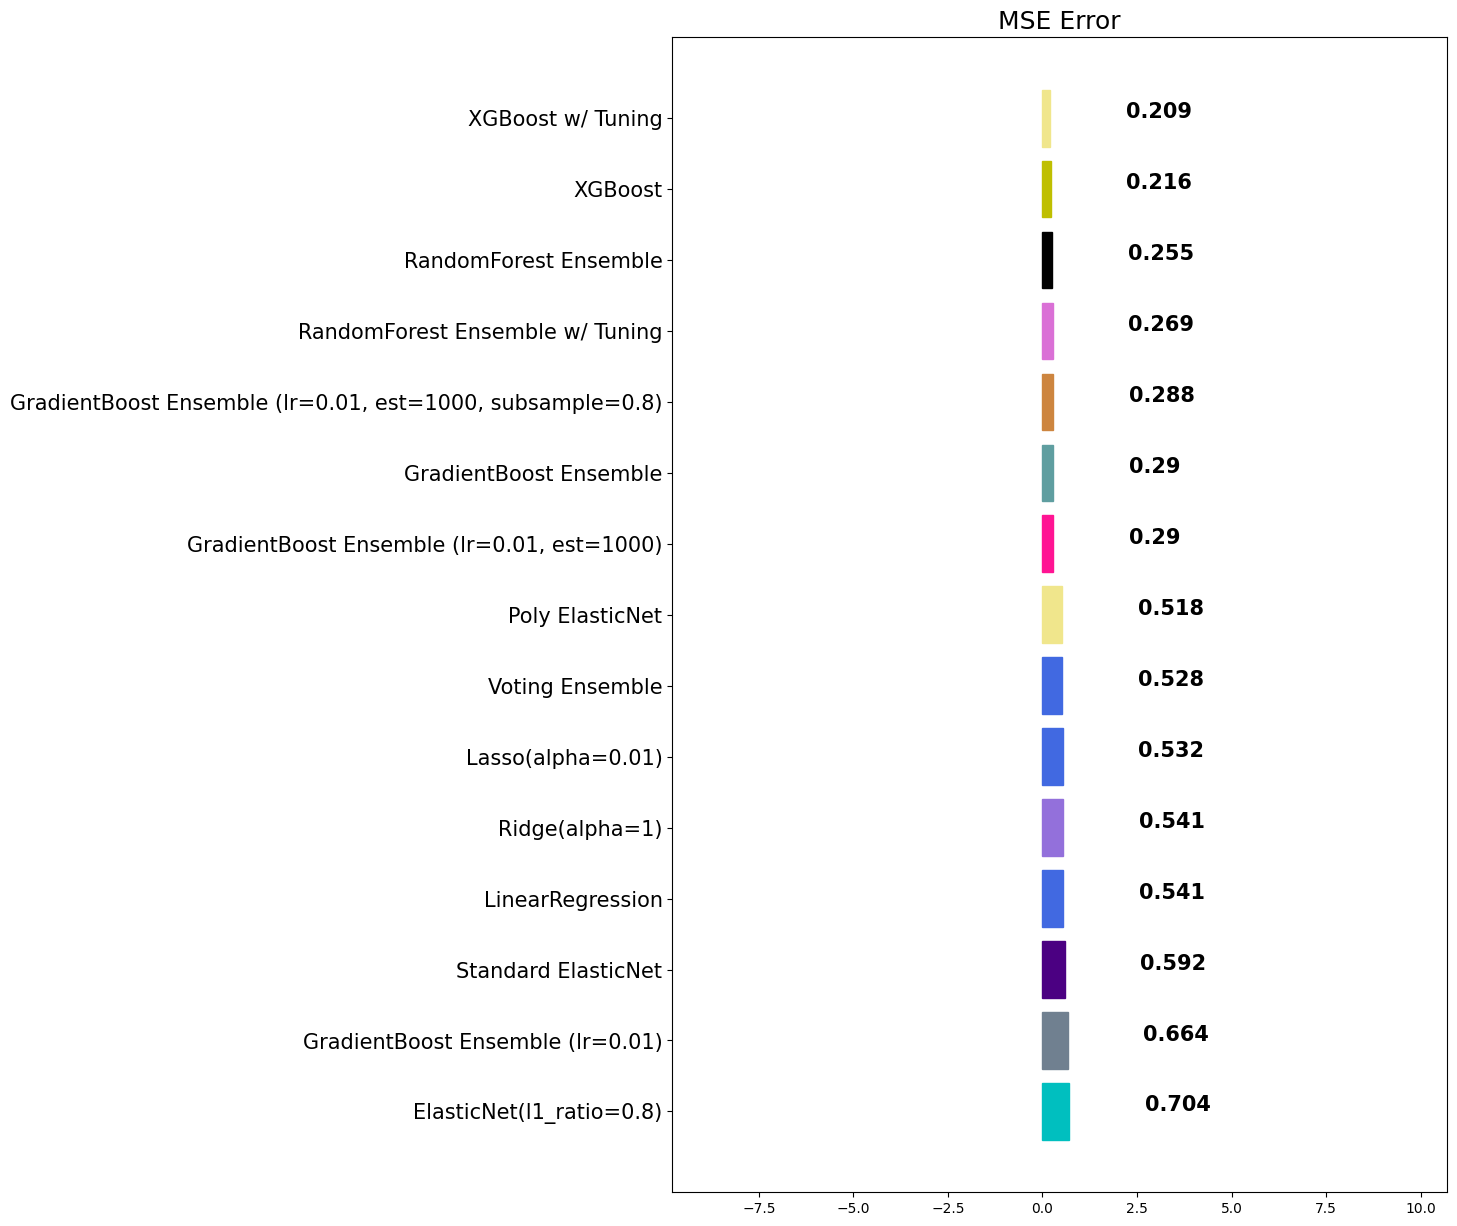

In [57]:
xgb = XGBRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.8, max_features=0.8, max_depth=7)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost w/ Tuning', xgb_pred, y_test)

### LightGBM

[공식 도큐먼트](https://lightgbm.readthedocs.io/en/latest/)

**주요 특징**
- scikit-learn 패키지가 아닙니다.
- 성능이 우수함
- 속도도 매우 빠릅니다.

In [58]:
from lightgbm import LGBMRegressor, LGBMClassifier

Exception in thread Thread-5080 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\park0\miniconda3\envs\myDS\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\park0\miniconda3\envs\myDS\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\park0\miniconda3\envs\myDS\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 6: invalid start byte


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15480, number of used features: 8
[LightGBM] [Info] Start training from score 2.070349


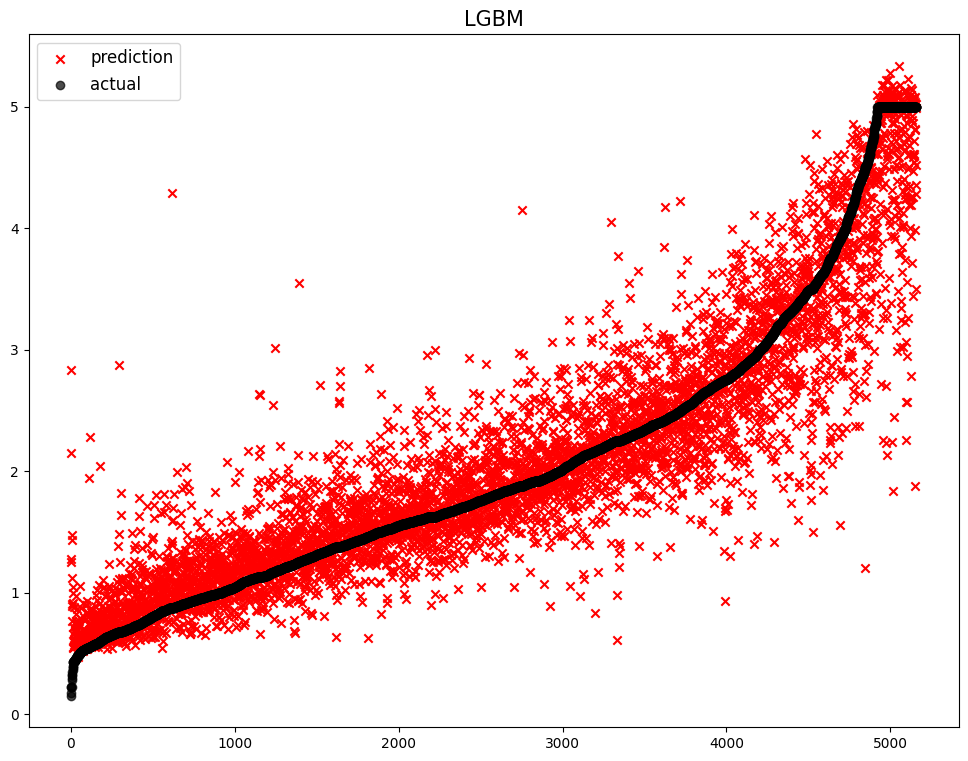

                                                model       mse
0                            ElasticNet(l1_ratio=0.8)  0.704071
1                    GradientBoost Ensemble (lr=0.01)  0.663872
2                                 Standard ElasticNet  0.592188
3                                    LinearRegression  0.541129
4                                      Ridge(alpha=1)  0.541047
5                                   Lasso(alpha=0.01)  0.532027
6                                     Voting Ensemble  0.527863
7                                     Poly ElasticNet  0.517807
8          GradientBoost Ensemble (lr=0.01, est=1000)  0.289908
9                              GradientBoost Ensemble  0.289523
10  GradientBoost Ensemble (lr=0.01, est=1000, sub...  0.287769
11                    RandomForest Ensemble w/ Tuning  0.268942
12                              RandomForest Ensemble  0.254764
13                                            XGBoost  0.216141
14                                      

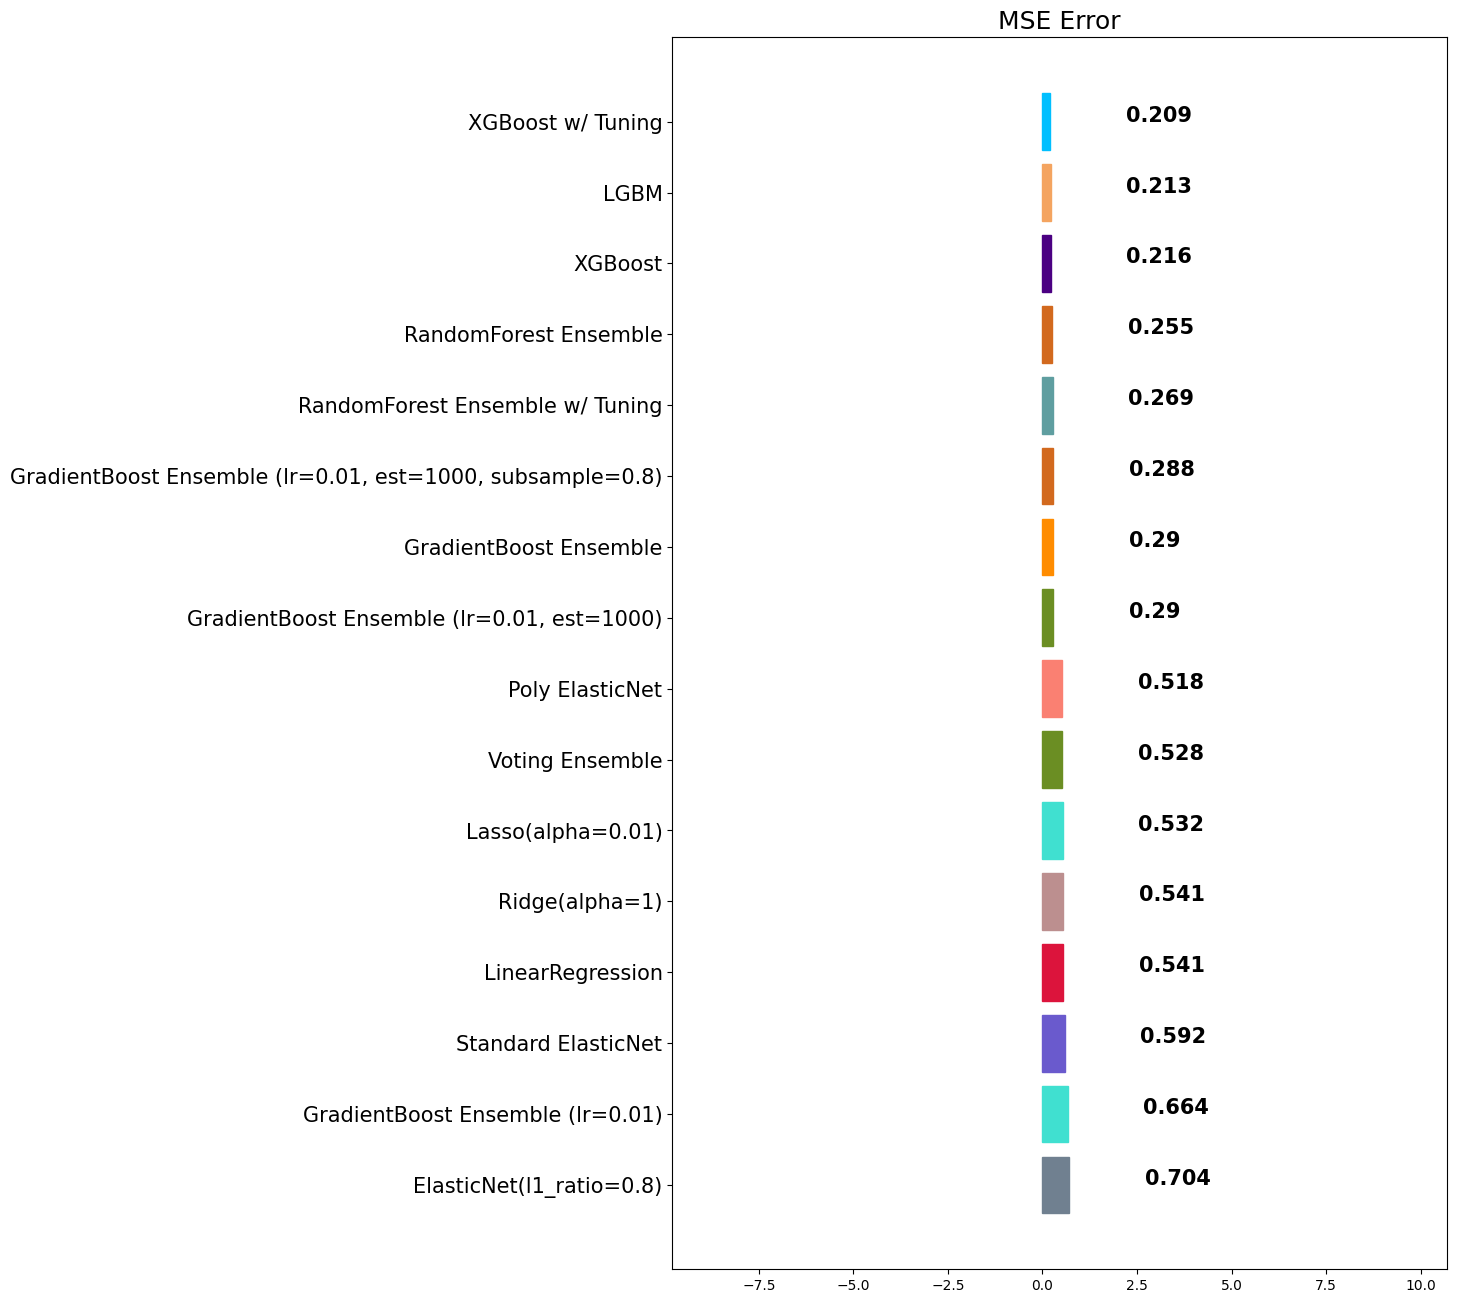

In [59]:
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('LGBM', lgbm_pred, y_test)

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- max_depth: 트리의 깊이. 과대적합 방지용. default=3. 
- colsample_bytree: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15480, number of used features: 8
[LightGBM] [Info] Start training from score 2.070349
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

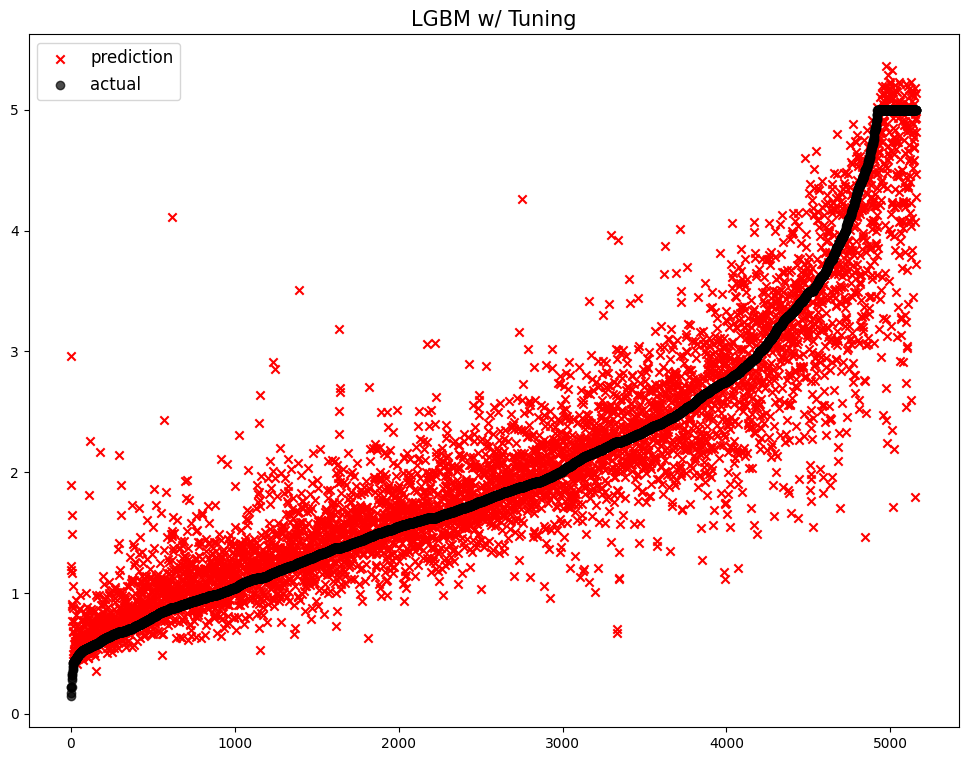

                                                model       mse
0                            ElasticNet(l1_ratio=0.8)  0.704071
1                    GradientBoost Ensemble (lr=0.01)  0.663872
2                                 Standard ElasticNet  0.592188
3                                    LinearRegression  0.541129
4                                      Ridge(alpha=1)  0.541047
5                                   Lasso(alpha=0.01)  0.532027
6                                     Voting Ensemble  0.527863
7                                     Poly ElasticNet  0.517807
8          GradientBoost Ensemble (lr=0.01, est=1000)  0.289908
9                              GradientBoost Ensemble  0.289523
10  GradientBoost Ensemble (lr=0.01, est=1000, sub...  0.287769
11                    RandomForest Ensemble w/ Tuning  0.268942
12                              RandomForest Ensemble  0.254764
13                                            XGBoost  0.216141
14                                      

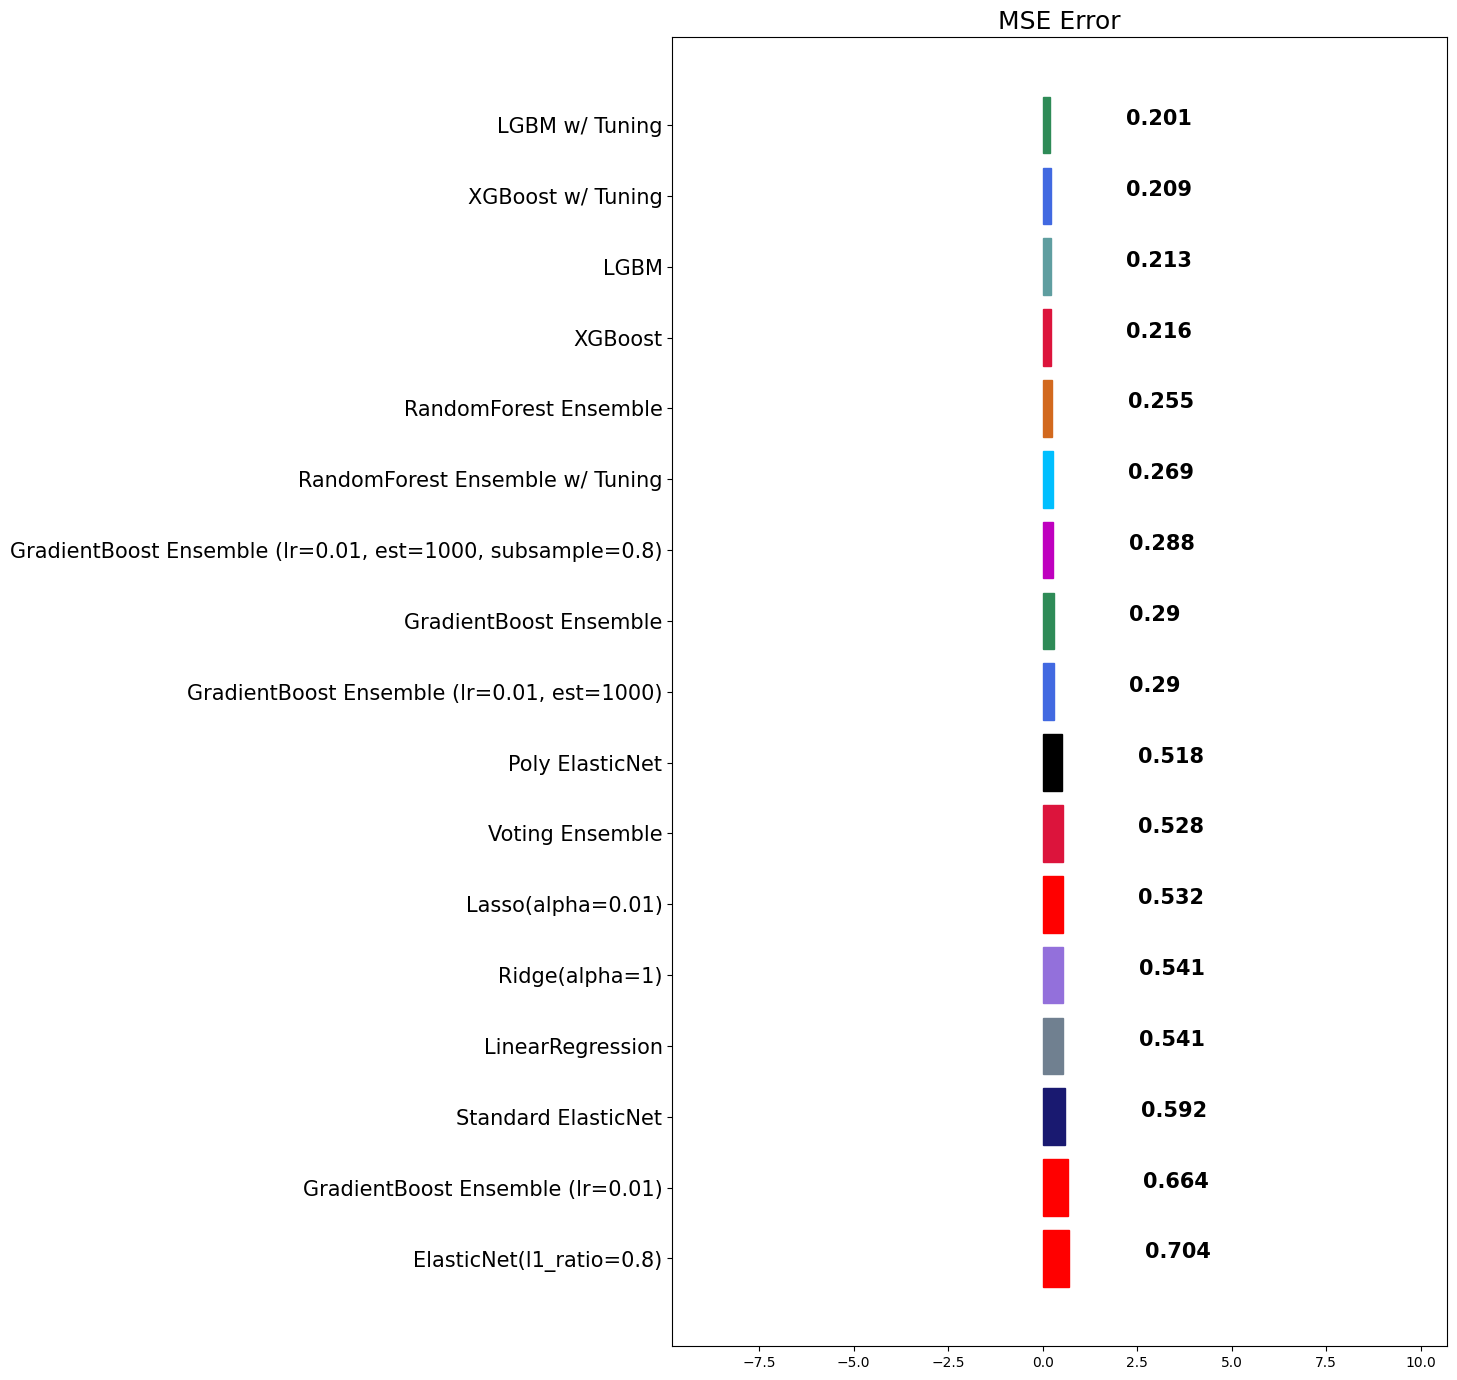

In [60]:
lgbm = LGBMRegressor(random_state=42, learning_rate=0.01, n_estimators=2000, colsample_bytree=0.9, subsample=0.9, max_depth=7)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('LGBM w/ Tuning', lgbm_pred, y_test)

### CatBoost

[공식 문서](https://catboost.ai/docs/)

**CatBoost (Categorical Boosting)**는 Yandex에서 개발한 그래디언트 부스팅 라이브러리입니다.

**주요 특징**
- scikit-learn 패키지가 아닙니다. (`pip install catboost`)
- **범주형 변수 자동 처리**: 별도의 인코딩 없이 범주형 데이터 직접 사용 가능
- **Ordered Boosting**: 과적합 방지를 위한 독창적인 부스팅 방식
- **대칭 트리 구조**: 균형 잡힌 트리로 빠른 예측 속도
- XGBoost, LightGBM과 함께 **3대 부스팅 라이브러리**로 불림
- 하이퍼파라미터 튜닝 없이도 좋은 성능을 내는 경우가 많음

In [61]:
# CatBoost 설치 필요: pip install catboost
from catboost import CatBoostRegressor, CatBoostClassifier

ModuleNotFoundError: No module named 'catboost'

In [ ]:
# CatBoost 기본 모델
cat = CatBoostRegressor(random_state=42, verbose=0)  # verbose=0: 학습 로그 숨김
cat.fit(x_train, y_train)
cat_pred = cat.predict(x_test)

mse_eval('CatBoost', cat_pred, y_test)

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- learning_rate(=eta): 학습률. 높을수록 빠르지만 과적합 위험
- iterations: 트리의 개수 (n_estimators와 동일)
- depth: 트리의 최대 깊이 (max_depth와 동일)
- l2_leaf_reg: L2 정규화 (과적합 방지)
- bagging_temperature: 배깅 강도 조절
- cat_features: 범주형 변수의 인덱스 지정 (자동 인코딩)

In [ ]:
# CatBoost 튜닝
cat = CatBoostRegressor(
    random_state=42, 
    verbose=0,
    learning_rate=0.03,
    iterations=1000,
    depth=6,
    l2_leaf_reg=3
)
cat.fit(x_train, y_train)
cat_pred = cat.predict(x_test)

mse_eval('CatBoost w/ Tuning', cat_pred, y_test)

### HistGradientBoosting (Histogram-based Gradient Boosting)

[공식 문서](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html)

**HistGradientBoosting**은 scikit-learn에 내장된 히스토그램 기반 그래디언트 부스팅입니다.

**주요 특징**
- **scikit-learn 내장**: 별도 설치 없이 사용 가능
- LightGBM에서 영감을 받아 개발됨
- **대용량 데이터에서 매우 빠름** (10,000개 이상 샘플에서 특히 효과적)
- **결측치 자동 처리**: NaN 값을 자동으로 처리
- **범주형 변수 네이티브 지원**: categorical_features 파라미터 사용
- GradientBoosting보다 훨씬 빠른 학습 속도

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingClassifier

In [ ]:
# HistGradientBoosting 기본 모델
hgb = HistGradientBoostingRegressor(random_state=42)
hgb.fit(x_train, y_train)
hgb_pred = hgb.predict(x_test)

mse_eval('HistGradientBoosting', hgb_pred, y_test)

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값
- learning_rate: 학습률 (기본값 0.1)
- max_iter: 부스팅 반복 횟수 (트리 개수)
- max_depth: 트리의 최대 깊이 (None이면 제한 없음)
- min_samples_leaf: 리프 노드의 최소 샘플 수
- l2_regularization: L2 정규화 강도
- max_bins: 히스토그램 빈의 최대 개수 (최대 255)

In [ ]:
# HistGradientBoosting 튜닝
hgb = HistGradientBoostingRegressor(
    random_state=42,
    learning_rate=0.05,
    max_iter=500,
    max_depth=8,
    min_samples_leaf=20,
    l2_regularization=0.1
)
hgb.fit(x_train, y_train)
hgb_pred = hgb.predict(x_test)

mse_eval('HistGradientBoosting w/ Tuning', hgb_pred, y_test)

### AdaBoost (Adaptive Boosting)

[공식 문서](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html)

**AdaBoost**는 가장 초기의 부스팅 알고리즘 중 하나입니다.

**주요 특징**
- **적응적 가중치 부여**: 이전 모델이 틀린 샘플에 더 높은 가중치 부여
- **약한 학습기 결합**: 기본적으로 DecisionTree(depth=1)를 사용
- 간단하고 해석이 쉬움
- 과적합에 상대적으로 강함
- GradientBoosting보다 단순하지만, 경우에 따라 좋은 성능

**AdaBoost vs GradientBoosting**
- AdaBoost: 샘플 가중치를 조정
- GradientBoosting: 잔차(residual)를 학습

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier

In [ ]:
# AdaBoost 기본 모델
ada = AdaBoostRegressor(random_state=42)
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)

mse_eval('AdaBoost', ada_pred, y_test)

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값
- n_estimators: 약한 학습기의 개수 (기본값 50)
- learning_rate: 각 약한 학습기의 기여도 (기본값 1.0)
- estimator: 기본 학습기 (기본값: DecisionTreeRegressor(max_depth=3))
- loss: 손실 함수 ('linear', 'square', 'exponential')

In [ ]:
# AdaBoost 튜닝 (더 깊은 트리 사용)
from sklearn.tree import DecisionTreeRegressor

ada = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    loss='square'
)
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)

mse_eval('AdaBoost w/ Tuning', ada_pred, y_test)

### ExtraTrees (Extremely Randomized Trees)

[공식 문서](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html)

**ExtraTrees**는 RandomForest의 변형으로, 더 극단적인 무작위성을 가집니다.

**주요 특징**
- RandomForest보다 **더 빠른 학습 속도**
- 분할점을 **완전히 무작위로 선택** (최적 분할점 탐색 없음)
- 다양성이 높아 과적합에 강함
- 경우에 따라 RandomForest보다 좋은 성능

**ExtraTrees vs RandomForest**
- RandomForest: 각 분할에서 최적의 분할점 탐색
- ExtraTrees: 각 분할에서 무작위 분할점 선택 → 더 빠름

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier

In [ ]:
# ExtraTrees 기본 모델
etr = ExtraTreesRegressor(random_state=42, n_jobs=-1)
etr.fit(x_train, y_train)
etr_pred = etr.predict(x_test)

mse_eval('ExtraTrees', etr_pred, y_test)

In [ ]:
# ExtraTrees 튜닝
etr = ExtraTreesRegressor(
    random_state=42, 
    n_jobs=-1,
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2
)
etr.fit(x_train, y_train)
etr_pred = etr.predict(x_test)

mse_eval('ExtraTrees w/ Tuning', etr_pred, y_test)

### Stacking

개별 모델이 예측한 데이터를 기반으로 **final_estimator** 종합하여 예측을 수행합니다.

- 성능을 극으로 끌어올릴 때 활용하기도 합니다.
- 과대적합을 유발할 수 있습니다. (특히, 데이터셋이 적은 경우)

[공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html)

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
# Stacking (CatBoost는 sklearn 1.6+ 호환성 문제로 제외)
# CatBoost를 사용하려면: pip install --upgrade catboost 후 커널 재시작
stack_models = [
    ('elasticnet', poly_pipeline), 
    ('randomforest', rfr), 
    ('gbr', gbr),
    ('lgbm', lgbm),
    # ('catboost', cat),  # sklearn 1.6+ 호환성 문제로 주석 처리
    ('histgb', hgb),
    ('extratrees', etr),
]

In [ ]:
stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1)

In [ ]:
stack_reg.fit(x_train, y_train)
stack_pred = stack_reg.predict(x_test)
mse_eval('Stacking Ensemble', stack_pred, y_test)

### Weighted Blending

각 모델의 예측값에 대하여 weight를 곱하여 최종 output 계산
- 모델에 대한 가중치를 조절하여, 최종 output을 산출합니다.
- **가중치의 합은 1.0**이 되도록 합니다.

In [ ]:
# 새로 추가한 모델들을 포함한 Weighted Blending
final_outputs = {
    'elasticnet': poly_pred, 
    'randomforest': rfr_pred, 
    'gbr': gbr_pred,
    'xgb': xgb_pred, 
    'lgbm': lgbm_pred,
    'catboost': cat_pred,     # CatBoost 추가
    'histgb': hgb_pred,       # HistGradientBoosting 추가
    'extratrees': etr_pred,   # ExtraTrees 추가
    'stacking': stack_pred,
}

In [ ]:
# 가중치 합이 1.0이 되도록 조정
# 일반적으로 성능이 좋은 모델에 더 높은 가중치 부여
final_prediction = (
    final_outputs['elasticnet'] * 0.05 +
    final_outputs['randomforest'] * 0.05 +
    final_outputs['gbr'] * 0.10 +
    final_outputs['xgb'] * 0.20 +
    final_outputs['lgbm'] * 0.20 +
    final_outputs['catboost'] * 0.15 +
    final_outputs['histgb'] * 0.10 +
    final_outputs['extratrees'] * 0.05 +
    final_outputs['stacking'] * 0.10
)

In [ ]:
mse_eval('Weighted Blending', final_prediction, y_test)

## 앙상블 모델을 정리하며

1. 앙상블은 대체적으로 단일 모델 대비 성능이 좋습니다.
2. 앙상블을 앙상블하는 기법인 Stacking과 Weighted Blending도 참고해 볼만 합니다.
3. 앙상블 모델은 적절한 **Hyperparameter 튜닝**이 중요합니다.
4. 앙상블 모델은 대체적으로 학습시간이 더 오래 걸립니다.
5. 따라서, 모델 튜닝을 하는 데에 걸리는 시간이 오래 소요됩니다.

## 부스팅 모델 성능 비교 요약

| 모델 | 장점 | 단점 | 추천 상황 |
|------|------|------|----------|
| **GradientBoosting** | 안정적, sklearn 내장 | 느림 | 소규모 데이터, 학습용 |
| **XGBoost** | 빠름, 정규화 내장, GPU 지원 | 메모리 사용량 높음 | 범용적 사용, 대회 |
| **LightGBM** | 가장 빠름, 대용량 처리 | 작은 데이터에서 과적합 위험 | 대용량 데이터 |
| **CatBoost** | 범주형 자동 처리, 과적합 방지 | 상대적으로 느림 | 범주형 변수 많은 경우 |
| **HistGradientBoosting** | sklearn 내장, 빠름, 결측치 처리 | XGBoost/LightGBM보다 기능 적음 | 추가 설치 불가 환경 |
| **AdaBoost** | 간단함, 해석 쉬움 | 노이즈에 민감 | 해석 필요한 경우 |
| **RandomForest** | 안정적, 과적합에 강함 | 단일 트리보다 느림 | 배깅 기반 baseline |
| **ExtraTrees** | RandomForest보다 빠름 | 분산이 클 수 있음 | 빠른 학습 필요시 |

**일반적인 성능 순위 (데이터에 따라 다름)**
1. CatBoost / LightGBM / XGBoost (거의 동급)
2. HistGradientBoosting
3. GradientBoosting / RandomForest / ExtraTrees
4. AdaBoost

In [ ]:
# 전체 모델 성능 비교표 출력
print("=" * 50)
print("전체 앙상블 모델 MSE 성능 비교")
print("=" * 50)
my_predictions.sort_values('mse').reset_index(drop=True)

In [ ]:
# 모델 성능 시각화
sorted_preds = my_predictions.sort_values('mse')

plt.figure(figsize=(12, 8))
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(sorted_preds)))
bars = plt.barh(sorted_preds['model'], sorted_preds['mse'], color=colors)
plt.xlabel('MSE (낮을수록 좋음)', fontsize=12)
plt.title('앙상블 모델 MSE 성능 비교', fontsize=14)
plt.gca().invert_yaxis()

# 값 표시
for bar, mse in zip(bars, sorted_preds['mse']):
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, 
             f'{mse:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## Cross Validation

- Cross Validation이란 모델을 평가하는 하나의 방법입니다.
- K-겹 교차검증(K-fold Cross Validation)을 많이 활용합니다.

**K-겹 교차검증**
- K-겹 교차 검증은 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 합니다. 아래의 그림을 보면, 데이터를 5개로 쪼개 매번 테스트셋을 바꿔나가는 것을 볼 수 있습니다.

[예시]
- Estimation 1일때,

학습데이터: [B, C, D, E] / 검증데이터: [A]

- Estimation 2일때,

학습데이터: [A, C, D, E] / 검증데이터: [B]

In [ ]:
Image('https://static.packt-cdn.com/products/9781789617740/graphics/b04c27c5-7e3f-428a-9aa6-bb3ebcd3584c.png', width=800)

**K-Fold Cross Validation Set 만들기**

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
n_splits = 5
kfold = KFold(n_splits=n_splits, random_state=42)

In [ ]:
df.head()

In [ ]:
X = np.array(df.drop('MedHouseVal', axis=1))
Y = np.array(df['MedHouseVal'])

In [ ]:
lgbm_fold = LGBMRegressor(random_state=42)

In [ ]:
i = 1
total_error = 0
for train_index, test_index in kfold.split(X):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = Y[train_index], Y[test_index]
    lgbm_pred_fold = lgbm_fold.fit(x_train_fold, y_train_fold).predict(x_test_fold)
    error = mean_squared_error(lgbm_pred_fold, y_test_fold)
    print('Fold = {}, prediction score = {:.2f}'.format(i, error))
    total_error += error
    i+=1
print('---'*10)
print('Average Error: %s' % (total_error / n_splits))

## Hyperparameter 튜닝

- hypterparameter 튜닝시 경우의 수가 너무 많습니다.
- 따라서, 우리는 자동화할 필요가 있습니다.

sklearn 패키지에서 자주 사용되는 hyperparameter 튜닝을 돕는 클래스는 다음 2가지가 있습니다.

1. **RandomizedSearchCV**
2. **GridSearchCV**

**적용하는 방법**

1. 사용할 Search 방법을 선택합니다.
2. hyperparameter 도메인을 설정합니다. (`max_depth`, `n_estimators`..등등)
3. 학습을 시킨 후, 기다립니다.
4. 도출된 결과 값을 모델에 적용하고 성능을 비교합니다.

## RandomizedSearchCV

- 모든 매개 변수 값이 시도되는 것이 아니라 지정된 분포에서 고정 된 수의 매개 변수 설정이 샘플링됩니다. 
- 시도 된 매개 변수 설정의 수는 `n_iter`에 의해 제공됩니다.

**주요 Hyperparameter (LGBM)**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- max_depth: 트리의 깊이. 과대적합 방지용. default=3. 
- colsample_bytree: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

In [ ]:
params = {
    'n_estimators': [200, 500, 1000, 2000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [6, 7, 8], 
    'colsample_bytree': [0.8, 0.9, 1.0], 
    'subsample': [0.8, 0.9, 1.0],
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

`n_iter` 값을 조절하여, 총 몇 회의 시도를 진행할 것인지 정의합니다.

(회수가 늘어나면, 더 좋은 parameter를 찾을 확률은 올라가지만, 그만큼 시간이 오래걸립니다.)

In [ ]:
clf = RandomizedSearchCV(LGBMRegressor(), params, random_state=42, cv=3, n_iter=25, scoring='neg_mean_squared_error')

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

In [ ]:
lgbm_best = LGBMRegressor(n_estimators=2000, subsample=0.8, max_depth=7, learning_rate=0.01, colsample_bytree=0.8)
lgbm_best_pred = lgbm_best.fit(x_train, y_train).predict(x_test)
mse_eval('RandomSearch LGBM', lgbm_best_pred, y_test)

## GridSearchCV

- 모든 매개 변수 값에 대하여 **완전 탐색**을 시도합니다.
- 따라서, 최적화할 parameter가 많다면, **시간이 매우 오래**걸립니다.

In [ ]:
params = {
    'n_estimators': [500, 1000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [7, 8], 
    'colsample_bytree': [0.8, 0.9], 
    'subsample': [0.8, 0.9,],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
lgbm_best = LGBMRegressor(n_estimators=500, subsample=0.8, max_depth=7, learning_rate=0.05, colsample_bytree=0.8)
lgbm_best_pred = lgbm_best.fit(x_train, y_train).predict(x_test)
mse_eval('GridSearch LGBM', lgbm_best_pred, y_test)